In [1]:
# Let's use the entire available screen width for the notebook
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

## Importing all the useful packages

In [2]:
import prodimopy.read as pread
import prodimopy.plot as pplot
from matplotlib.backends.backend_pdf import PdfPages
from tqdm import tqdm
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.constants import h as planck_h
from scipy.constants import k as boltzmann_k
from scipy.constants import c as speed_of_light
from scipy.constants import astronomical_unit as au
from scipy.constants import parsec as pc
# %matplotlib notebook
import os.path
from os.path import join

# Opening the Model

In [3]:
model_path = './sample_model'
model = pread.read_prodimo(model_path)

READ: Reading File:  ./sample_model/ProDiMo.out  ...
READ: Reading File:  ./sample_model/Species.out  ...


C:\Users\niels\OneDrive\Documenten\BRP\.venv\Lib\site-packages\prodimopy\read.py:2750: DeprecationWarning: `np.chararray` is deprecated and will be removed from the main namespace in the future. Use an array with a string or bytes dtype instead.
  data._radFields_cache=np.chararray(shape=(data.nx,data.nz,data.nlam),itemsize=13)
C:\Users\niels\OneDrive\Documenten\BRP\.venv\Lib\site-packages\prodimopy\read.py:2751: DeprecationWarning: `np.chararray` is deprecated and will be removed from the main namespace in the future. Use an array with a string or bytes dtype instead.
  data._nmol_cache=np.chararray((data.nx,data.nz,data.nspec),itemsize=13)
C:\Users\niels\OneDrive\Documenten\BRP\.venv\Lib\site-packages\prodimopy\read.py:2752: DeprecationWarning: `np.chararray` is deprecated and will be removed from the main namespace in the future. Use an array with a string or bytes dtype instead.
  data._heat_cache=np.chararray((data.nx,data.nz,data.nheat),itemsize=13)
C:\Users\niels\OneDrive\Docume

READ: Reading File:  ./sample_model/FlineEstimates.out  ...
READ: Reading File:  ./sample_model/Elements.out  ...
READ: Reading File:  ./sample_model/dust_opac.out  ...
READ: Reading File:  ./sample_model/dust_sigmaa.out  ...
READ: Reading File:  ./sample_model/StarSpectrum.out  ...
READ: Reading File:  ./sample_model/SED.out  ...
READ: Reading File:  ./sample_model/SEDana.out  ...
READ: Reading File:  ./sample_model/image.out  ...


C:\Users\niels\OneDrive\Documenten\BRP\.venv\Lib\site-packages\prodimopy\read.py:2330: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  self._Lbols[self.__incidx]=np.trapz(self.fnuErg[mask],x=self.nu[mask])*-1.0
C:\Users\niels\OneDrive\Documenten\BRP\.venv\Lib\site-packages\prodimopy\read.py:2336: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  self._Tbols[self.__incidx]=1.25e-11*np.trapz((self.nu[mask]*self.fnuErg[mask]),x=self.nu[mask])/np.trapz(self.fnuErg[mask],x=self.nu[mask])


READ: Reading File:  ./sample_model/specFLiTs.out  ...
READ: Reading File:  ./sample_model/Parameter.out  ...
INFO: Reading time:  18.83 s
 


PLOT: plot_NH ...
PLOT: plot_cont ...
PLOT: plot_sed ...
LineEst: o-H2O            wl=     6.863287 μm  flux= 4.196e-18 W/m^2  (up=   60 low=    9)
LineEst: o-H2O            wl=     7.043932 μm  flux= 4.141e-18 W/m^2  (up=   71 low=   16)
LineEst: o-H2O            wl=     6.634856 μm  flux= 4.089e-18 W/m^2  (up=   59 low=    8)
LineEst: o-H2O            wl=     6.682774 μm  flux= 4.036e-18 W/m^2  (up=   68 low=   11)
LineEst: o-H2O            wl=     6.415790 μm  flux= 4.003e-18 W/m^2  (up=   59 low=    6)
LineEst: o-H2O            wl=     6.959140 μm  flux= 4.003e-18 W/m^2  (up=   67 low=   12)
LineEst: o-H2O            wl=     6.408665 μm  flux= 3.986e-18 W/m^2  (up=   61 low=    7)
LineEst: o-H2O            wl=     6.785859 μm  flux= 3.986e-18 W/m^2  (up=   73 low=   15)
LineEst: o-H2O            wl=     6.641267 μm  flux= 3.978e-18 W/m^2  (up=   55 low=    4)
LineEst: o-H2O            wl=     7.170376 μm  flux= 3.899e-18 W/m^2  (up=   77 low=   20)
LineEst: o-H2O            wl=    

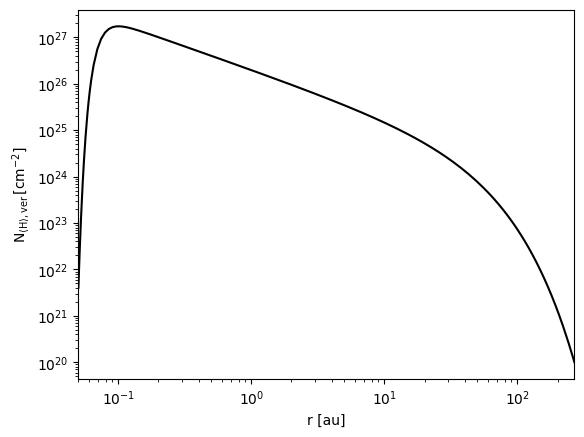

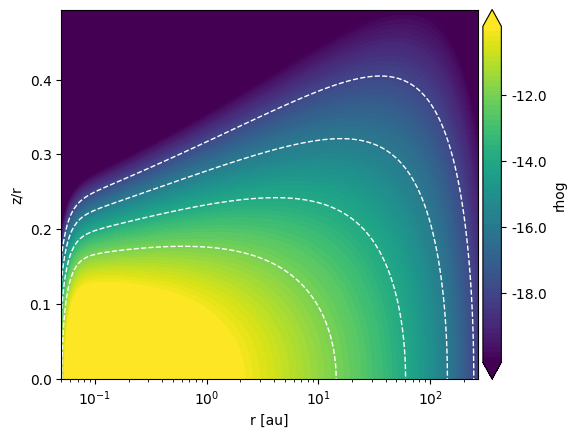

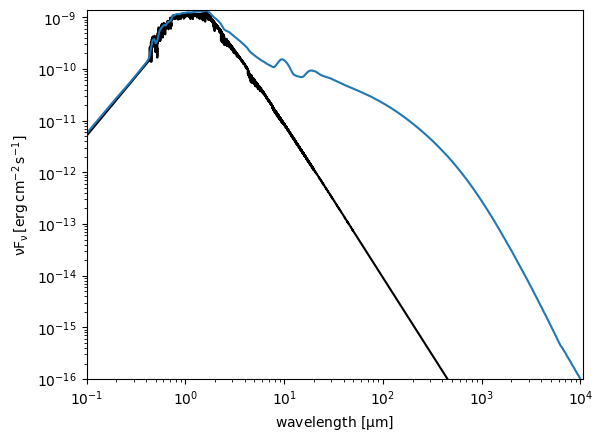

In [4]:
pp=pplot.Plot(None)

fig=pp.plot_NH(model)
fig=pp.plot_cont(model,model.rhog,label="rhog",zlim=[1.e-20,1.e-10],extend="both")
fig=pp.plot_sed(model,sedObs=model.sedObs)
stronglines=[line for line in model.selectLineEstimates(ident="CO") if (line.flux > 1e-20 and line.wl > 800.)]
# print(*sorted(stronglines,key=lambda x: x.wl), sep="\n")
waterlines=model.selectLineEstimates(ident="o-H2O",wlrange=[5,20])+model.selectLineEstimates(ident="p-H2O",wlrange=[5,20])
waterlines=sorted(waterlines,key=lambda x: x.flux,reverse=True)[:50]
print(*waterlines, sep="\n")

PLOT: plot_cont ...
PLOT: plot_cont ...


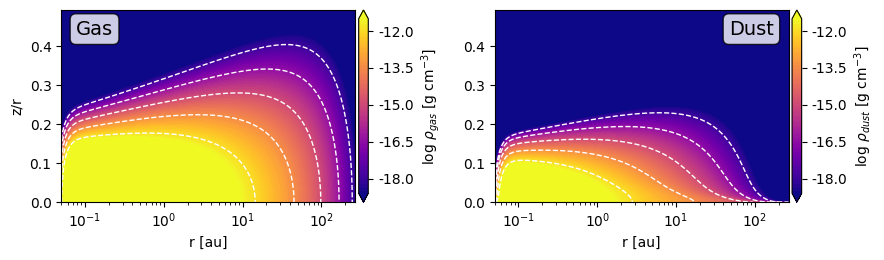

In [5]:
# use subplots to plot the gas density and dust density next to each other
fig, axs = plt.subplots(1, 2, figsize=(9, 2.7))
pp = pplot.Plot(None)
# This can be very useful is one wants to have multiple plots with a similar style
# Here we also change the color map
constyle = {"cmap": "plasma", "extend": "both", "cb_format": "%.1f", "zlim": [3.e-19, 3.e-12]}

fig = pp.plot_cont(model, model.rhog, label=r"log $\rho_{gas}$ [g cm$^{-3}$]", ax=axs[0], **constyle)
fig = pp.plot_cont(model, model.rhod, label=r"log $\rho_{dust}$ [g cm$^{-3}$]", ax=axs[1], **constyle)

# we do not need the z/r axis in the second plot
axs[1].set_ylabel("")

# place some text boxes on the plots
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
axs[0].text(0.05, 0.95, "Gas", transform=axs[0].transAxes, fontsize=14,
            verticalalignment='top', bbox=props)

ret = axs[1].text(0.95, 0.95, "Dust", transform=axs[1].transAxes, fontsize=14,
                  verticalalignment='top', horizontalalignment="right", bbox=props)
plt.tight_layout()

PLOT: plot_cont ...
PLOT: plot_cont ...


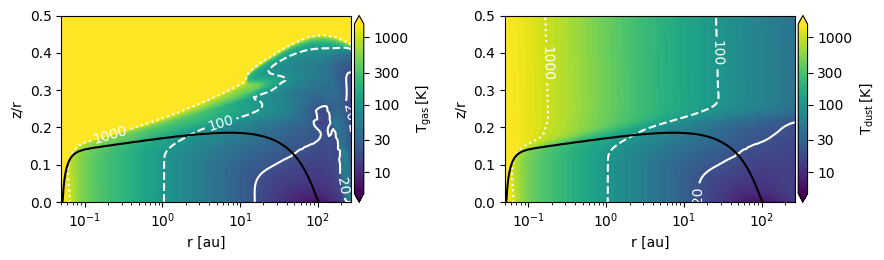

In [6]:
# use subplots to plot the gas density and dust density next to each other
fig, axs = plt.subplots(1, 2, figsize=(9, 2.7))
pp=pplot.Plot(None)

tcont=pplot.Contour(model.tg, [20,100,1000], linestyles=["-","--",":"],
                  showlabels=True,label_fontsize=10,label_fmt="%.0f")
#tcont.label_locations=[(100,100),(55,5),(40,5)]

# another contour, a simple one
avcont=pplot.Contour(model.AV,[1.0],colors="black")

cbticks=[10,30,100,300,1000]
_ = pp.plot_cont(model, model.tg, r"$\mathrm{T_{gas}\,[K]}$",zr=True,xlog=True,
                ylim=[0,0.5], zlim=[5,1500],extend="both",
                oconts=[tcont,avcont],   # here the addtional contour added
                contour=False,           # switch of the standard contours
                clevels=cbticks,         # explictly set ticks for the cbar
                clabels=map(str,cbticks),# and make some nice labels
                cb_format="%.0f",
                ax=axs[0],fig=fig)
tcont=pplot.Contour(model.td, [20,100,1000], linestyles=["-","--",":"],
                  showlabels=True,label_fontsize=10,label_fmt="%.0f")
_ = pp.plot_cont(model, model.td, r"$\mathrm{T_{dust}\,[K]}$",zr=True,xlog=True,
                ylim=[0,0.5], zlim=[5,1500],extend="both",
                oconts=[tcont,avcont],   # here the addtional contour added
                contour=False,           # switch of the standard contours
                clevels=cbticks,         # explictly set ticks for the cbar
                clabels=map(str,cbticks),# and make some nice labels
                cb_format="%.0f",
                ax=axs[1],fig=fig)
plt.tight_layout()

READ: Reading File:  ./sample_model/FlineEstimates.out  ...
LineEst: CO               wl=  1300.403645 μm  flux= 3.599e-20 W/m^2  (up=    3 low=    2)
READ: Reading File:  ./sample_model/FlineEstimates.out  ...
PLOT: plot_cont ...


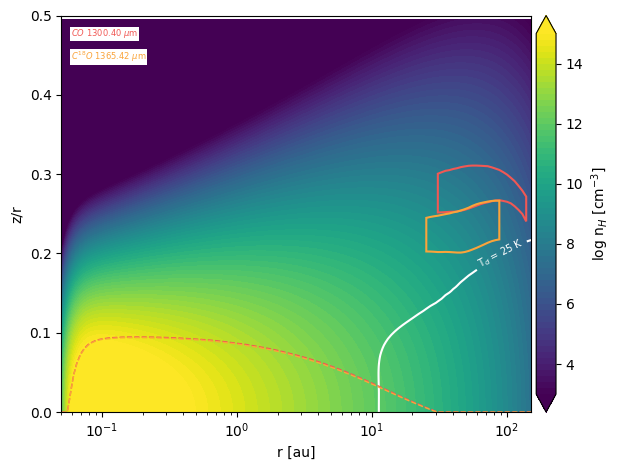

In [7]:
line=model.getLineEstimate(ident="CO",wl=1300.0)
print(line)

# We want to show also the CO ice line Assume a CO ice line at 25 K
cont=pplot.Contour(model.td,[25],label_fmt=r"T$_d$ = %.0f K",colors="white",linestyles="-",showlabels=True)


fig=pp.plot_line_origin(model,[["CO",1300],["C18O",1300]],field=model.nHtot,
                        label=r"log n$_{H}$ [cm$^{-3}$]",zlim=[1e3,1e15],extend="both",cb_format="%.0f",zr=True,xlog=True,
                        xlim=[None,150],ylim=[None,0.5],
                        showContOrigin=False,showRadialLines=False,
                        oconts=[cont]) # this adds an additional contour
plt.tight_layout()

PLOT: plot_abuncont ...
PLOT: plot_abuncont_grid ...
[1e-09, 0.01]
PLOT: plot_abuncont_grid ...
[1e-09, 0.01]
PLOT: plot_abuncont_grid ...
[1e-09, 0.01]


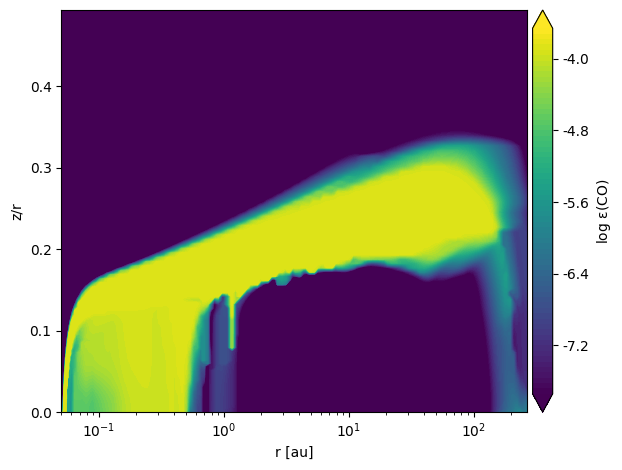

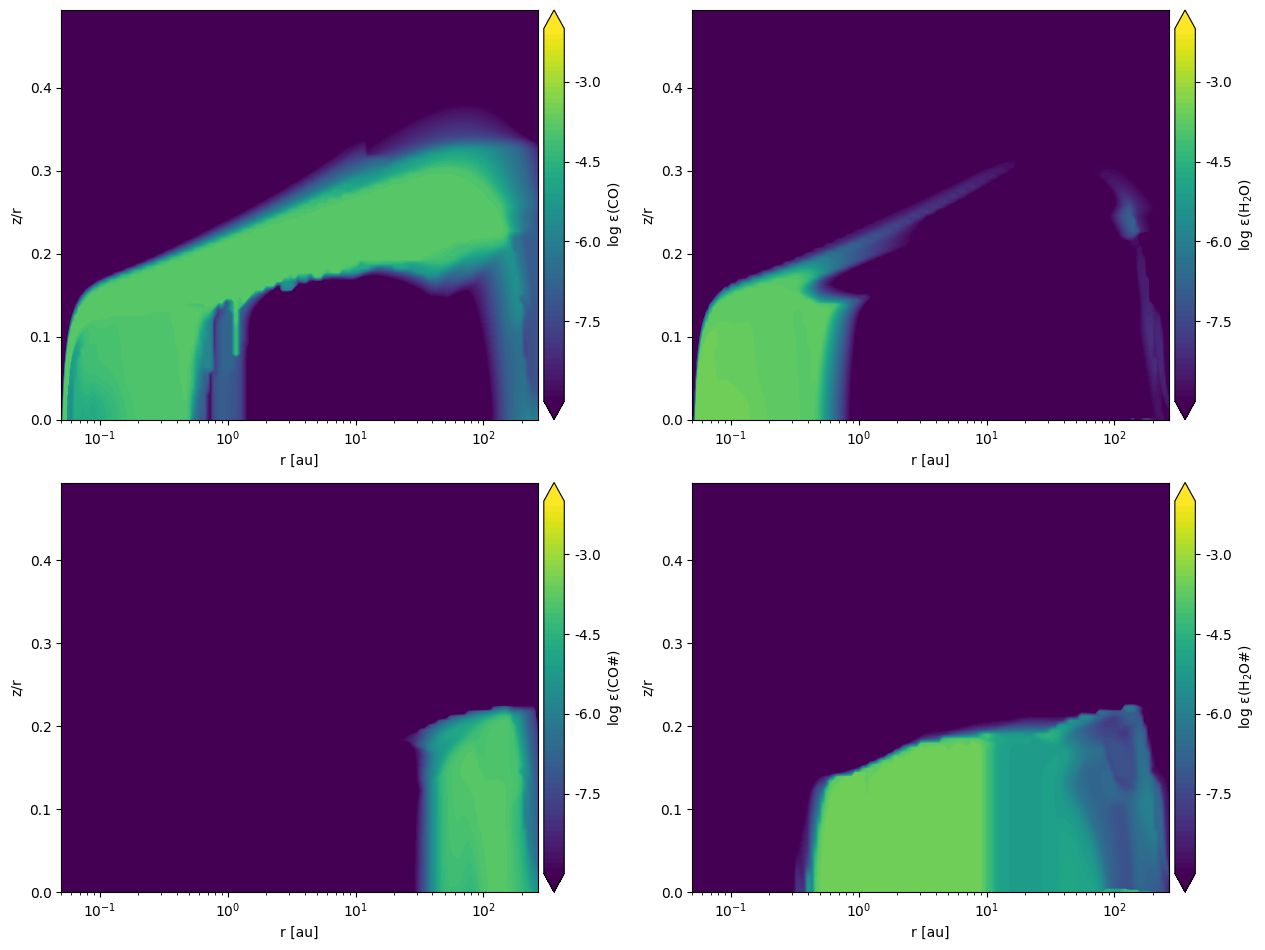

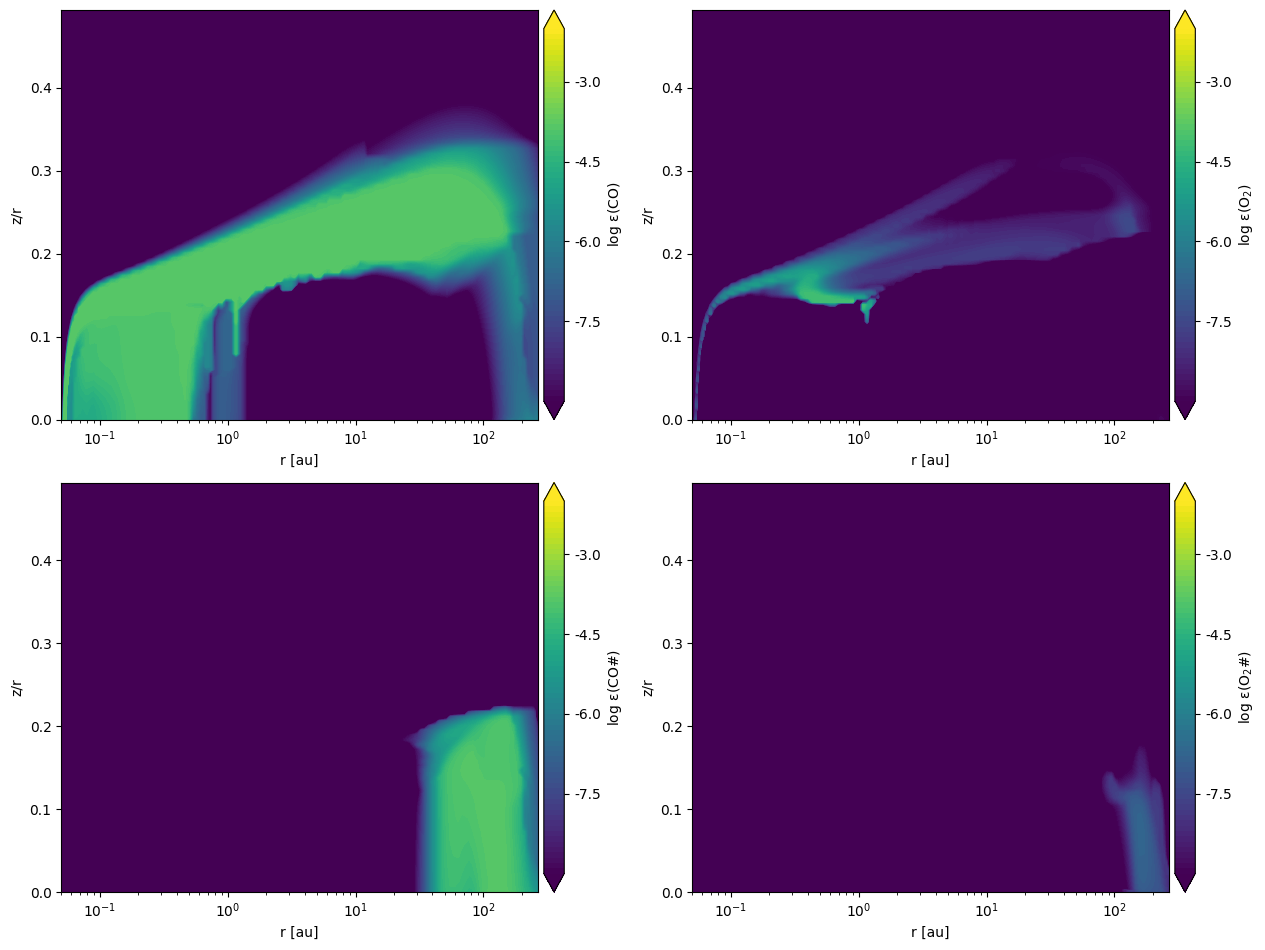

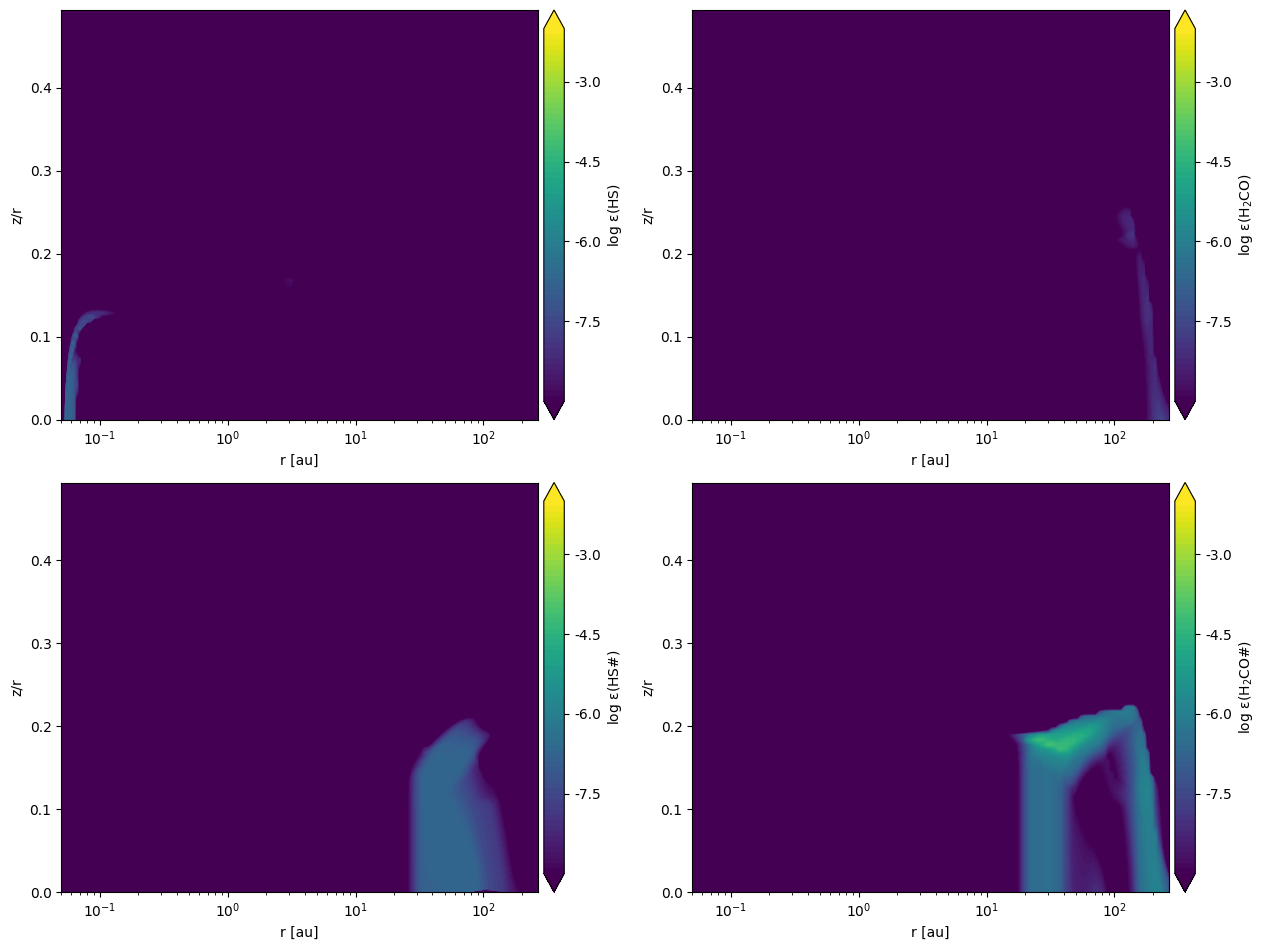

In [8]:
fig=pp.plot_abuncont(model,"CO",zlim=[2.e-8,2.e-4],extend="both",cb_format="%.1f",contour=False)
plt.tight_layout()

# Plotting grid with various abundances
# in the first row we want the gas phase abundances in the bottom row the ices
fig=pp.plot_abuncont_grid(model,
                          ["CO","H2O","CO#","H2O#"],nrows=2, ncols=2,
                          zlim=[1.e-9,1.e-2],extend="both",contour=False)
plt.tight_layout()
fig=pp.plot_abuncont_grid(model,
                          ["CO", "O2", "CO#", "O2#"],nrows=2, ncols=2,
                          zlim=[1.e-9,1.e-2],extend="both",contour=False)
plt.tight_layout()
fig=pp.plot_abuncont_grid(model,
                          ["HS", "H2CO", "HS#", "H2CO#"],nrows=2, ncols=2,
                          zlim=[1.e-9,1.e-2],extend="both",contour=False)
plt.tight_layout()

INFO: gen_specFromLineEstimates: build spectrum for 35719 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  17.66 s
INFO: gen_specFromLineEstimates: build spectrum for 35719 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  26.54 s
INFO: gen_specFromLineEstimates: build spectrum for 2132 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  2.36 s
INFO: gen_specFromLineEstimates: build spectrum for 2138 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  2.13 s


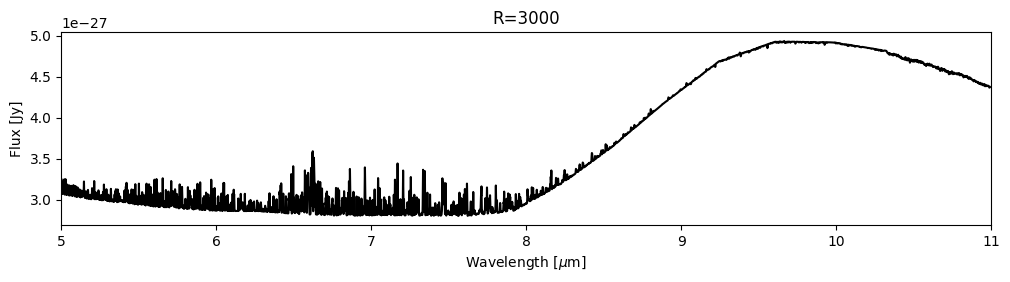

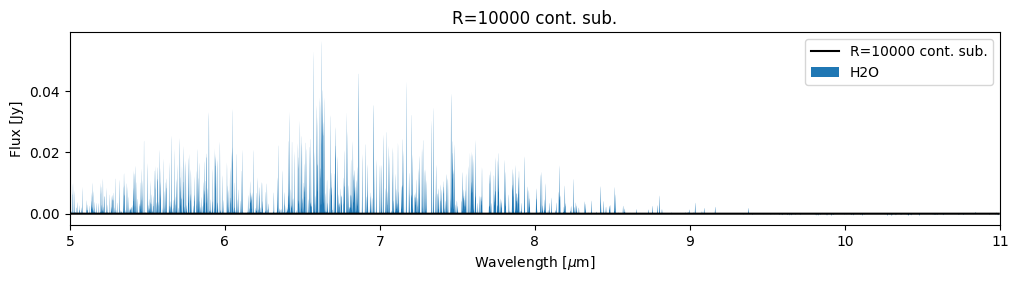

In [9]:
# We generate the spectrum
wlrange=[5,11]
spec=model.gen_specFromLineEstimates(wlrange=wlrange,unit="mJy",specR=3000)
specHRnocont=model.gen_specFromLineEstimates(wlrange=wlrange,unit="mJy",specR=3000,noCont=True)

for spec,label in zip([spec,specHRnocont],["R=3000","R=10000 cont. sub."]):
  # now we make a simple plot of the spectrum ... there is now plot function for that in prodimopy
  fig,ax=plt.subplots(figsize=(12,2.5))
  ax.plot(spec[0],spec[1],label=label, color='black')
  ax.set_xlim(wlrange)
  ax.set_xlabel(r"Wavelength [$\mu$m]") 
  ax.set_ylabel("Flux [Jy]")
  ax.set_title(label)

# # Now we want to plot some individual lines
# for ident in ["o-H2O", "p-H2O"]:
#   print(ident)
#   # In the last figure we can now also just overplot the line estimates for HCN
#   spec=model.gen_specFromLineEstimates(ident=ident,wlrange=wlrange,unit="Jy",specR=3000,noCont=True)
#   # ax.plot(spec[0],spec[1],label=ident)
#   ax.fill_between(spec[0],0, spec[1], alpha=1, label=ident)

waterspec =model.gen_specFromLineEstimates(ident='o-H2O',wlrange=wlrange,unit="Jy",specR=3000,noCont=True) + model.gen_specFromLineEstimates(ident='p-H2O',wlrange=wlrange,unit="Jy",specR=3000,noCont=True)
ax.fill_between(waterspec[0],0, waterspec[1], alpha=1, label='H2O')
ax.legend()
plt.show()

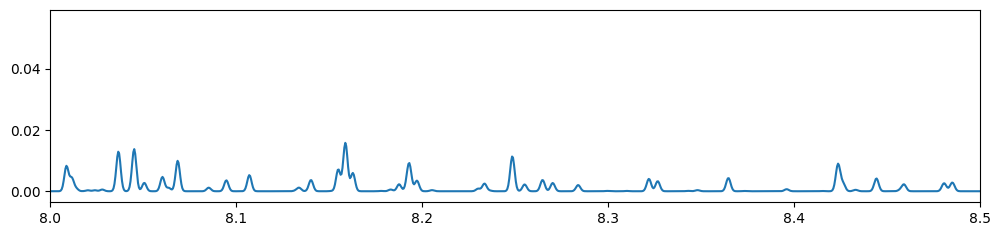

In [10]:
fig,ax=plt.subplots(figsize=(12,2.5))
ax.plot(waterspec[0], waterspec[1], alpha=1, label='H2O')
plt.xlim(8, 8.5)
plt.show()

PLOT: plot_starspec ...
PLOT: plot_sed ...
PLOT: dust opacities ...
PLOT: plot_NH ...
PLOT: plot_cont ...
PLOT: plot_cont ...
PLOT: plot_cont ...
PLOT: plot_cont ...
PLOT: plot_cont ...
PLOT: plot_cont ...
PLOT: plot_abuncont ...
PLOT: plot_abuncont ...
PLOT: plot_abuncont ...
PLOT: plot_abuncont ...
PLOT: plot_cdnmol ...
INFO: Calculate vertical column densities
PLOT: plot_avgabun ...
PLOT: plot_abunvert ...
READ: Reading File:  ./sample_model/FlineEstimates.out  ...
PLOT: plot_cont ...
READ: Reading File:  ./sample_model/FlineEstimates.out  ...
PLOT: plot_cont ...
PLOT: plot_cont ...
READ: Reading File:  ./sample_model/FlineEstimates.out  ...
PLOT: plot_cont ...
READ: Reading File:  ./sample_model/FlineEstimates.out  ...
PLOT: plot_cont ...
WARN: getAbun: Species 13CO not found.
READ: Reading File:  ./sample_model/FlineEstimates.out  ...
PLOT: plot_cont ...
READ: Reading File:  ./sample_model/FlineEstimates.out  ...
PLOT: plot_cont ...
READ: Reading File:  ./sample_model/FlineEstimat

TypeError: 'NoneType' object is not iterable

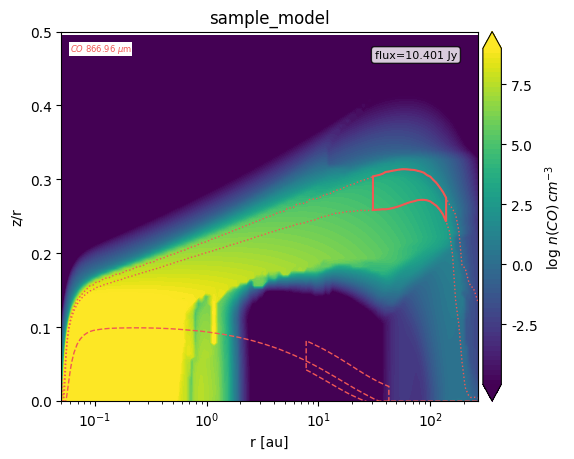

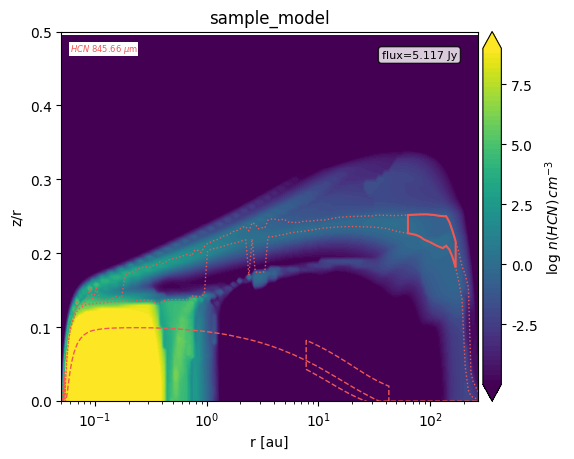

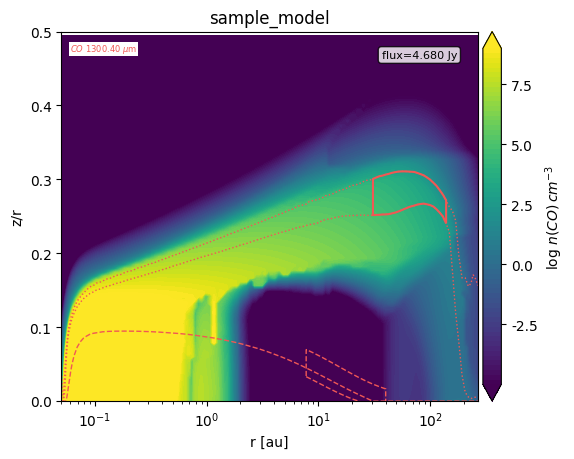

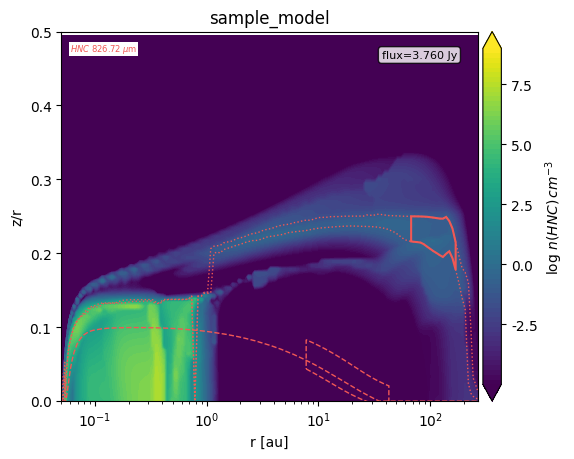

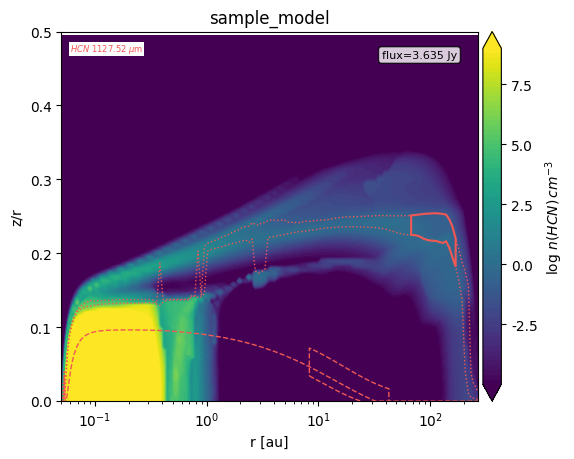

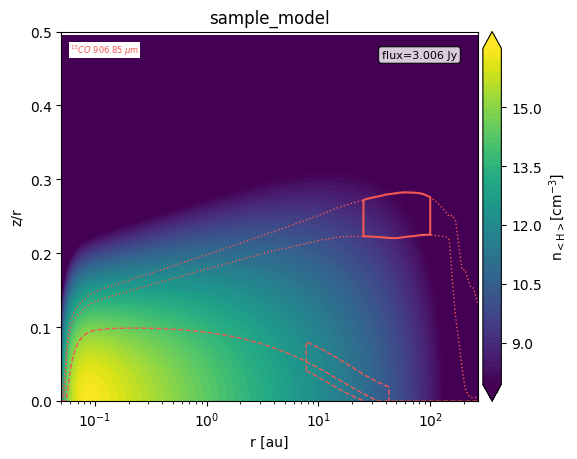

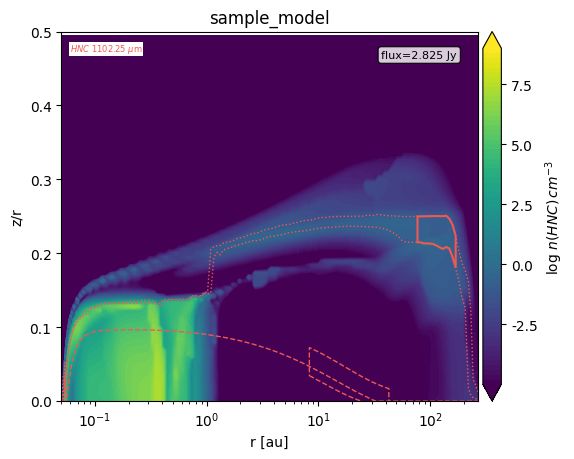

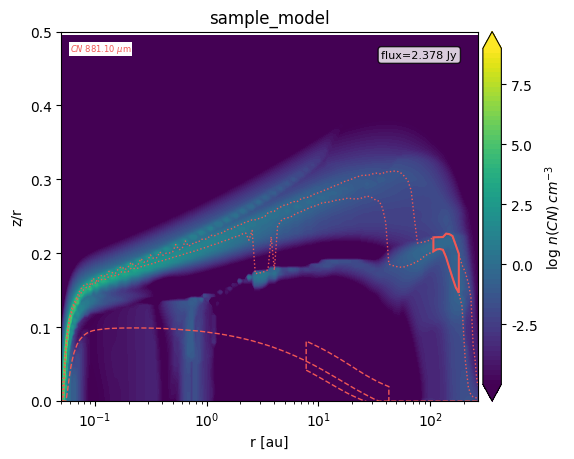

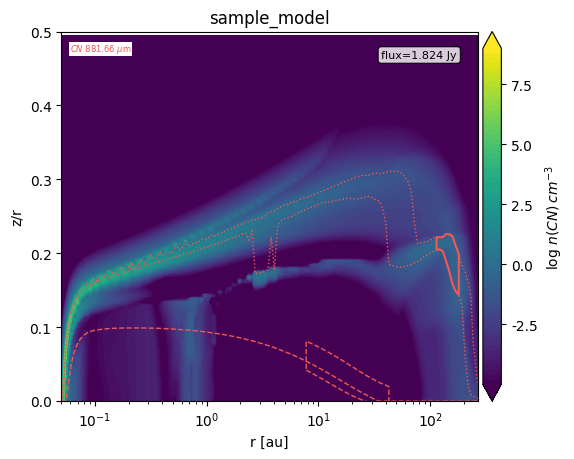

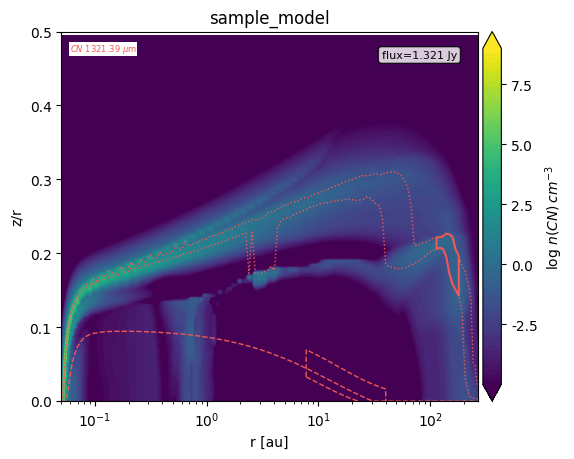

In [11]:
with PdfPages(os.path.join(model.directory,model.name+".pdf")) as pdf:
  pp=pplot.Plot(pdf,title=model.name)

  # This plots the Stellar spectrum
  pp.plot_starspec(model,ylim=[1.e-1,1.e11])

  if model.sed is not None:
    pp.plot_sed(model)

  pp.plot_dust_opac(model,ylim=[1.e-1,None])

  pp.plot_NH(model)

  # you can use latex for the labels!
  # note most of the parameters are optional
  pp.plot_cont(model, model.nHtot, r"$\mathrm{n_{<H>} [cm^{-3}]}$")

  pp.plot_cont(model, model.nHtot, r"$\mathrm{n_{<H>} [cm^{-3}]}$",contour=True,zr=False,xlog=False,ylog=False,
                  zlim=[1.e4,None], extend="both")
  pp.plot_cont(model, model.rhod, r"$\mathsf{\rho_{dust} [g\;cm^{-3}]}$",zr=True,xlog=True,ylog=False,
                  zlim=[1.e-25,None],extend="both")
  pp.plot_cont(model, model.nd, r"$\mathrm{n_{dust} [cm^{-3}]}$",contour=True,zr=True,xlog=True,ylog=False,
                  zlim=[1.e-8,None],extend="both")

  pp.plot_cont(model, model.tg, r"$\mathrm{T_{gas} [K]}$",contour=True,
                  zlim=[5,5000],extend="both")

  pp.plot_cont(model, model.tg, r"$\mathrm{T_{dust} [K]}$",contour=True,
                  zlim=[5,1500],extend="both")


  # Abundances
  # contour plots for a couple of species
  species=["CO","H2O","HCO+","HN2+"]
  for spname in species:
    pp.plot_abuncont(model, spname, zr=True,xlog=True,ylog=False, zlim=[1.e-4,3.e-15],extend="both")

  # plot the column densityies for those species in a single figure
  pp.plot_cdnmol(model,species)

  # Average abundances
  # plots the average abundances of the above species as a function of radius
  pp.plot_avgabun(model, species,ylim=[3.e-15,3.e-3])

  # Vertical abundances at a certain radius
  # this plots the vertical abundances at different radii for different species
  rs=[10]
  species=["CO","HCO+","e-","S+"]
  for r in rs:
    pp.plot_abunvert(model, r, species,ylim=[3.e-15,3.e-3])


  # get the 10 stronges line fluxes from Fline Estimates at mm wavelengths and plot the line orgins for them
  pptmp=pplot.Plot(None,title=model.name)
  lineests=model.selectLineEstimates(ident=None,wlrange=[800,1500])
  # sort them
  lineests.sort(key=lambda x: x.flux_Jy, reverse=True)
  nmax=10
  if len(lineests)<nmax: nmax=len(lineests)

  for lineest in lineests[:nmax]:
    # in case the ident really corresponds to a chemical species
    if model.getAbun(lineest.ident) is not None:
      fig=pptmp.plot_line_origin(model,[[lineest.ident,lineest.wl]],model.nmol[:,:,model.spnames[lineest.ident]],
                        label=r"log $n("+pplot.spnToLatex(lineest.ident)+r")\,cm^{-3}$",zlim=[1.e-5,1.e9],ylim=[None,0.5],
                        extend="both",showContOrigin=True)
    else:
      fig=pptmp.plot_line_origin(model,[[lineest.ident,lineest.wl]],model.nHtot,
                        label=r"$\mathrm{n_{<H>} [cm^{-3}]}$",zlim=[1.e8,None],ylim=[None,0.5],
                        extend="both",showContOrigin=True)

    ax=fig.axes[0]
    props = dict(boxstyle='round', facecolor='white', alpha=0.8)
    ax.text(0.95, 0.95, r"flux={:5.3f} Jy".format(lineest.flux_Jy),fontsize=8,
                transform=ax.transAxes,verticalalignment='top', horizontalalignment="right", bbox=props)
    pdf.savefig(fig)


  # Line profiles
  # Generate a plot with all the line profiles computed by ProDiMo from LineTransfer.in
  for line in model.lines:
    fig=pp.plot_lineprofile(model,line.wl,loc_legend="upper right")


(0.45, 0.5)

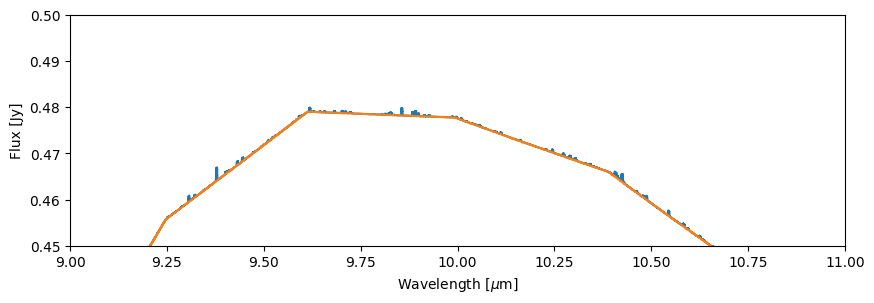

In [219]:
fig,ax = plt.subplots(figsize=(10,3))
ax.plot(model.FLiTsSpec.wl,model.FLiTsSpec.flux)
ax.plot(model.FLiTsSpec.wl,model.FLiTsSpec.flux_cont)
ax.set_ylabel('Flux [Jy]')
ax.set_xlabel(r'Wavelength [$\mu$m]')
ax.set_xlim(9, 11)
ax.set_ylim(0.45, 0.5)

(13.0, 18.0)

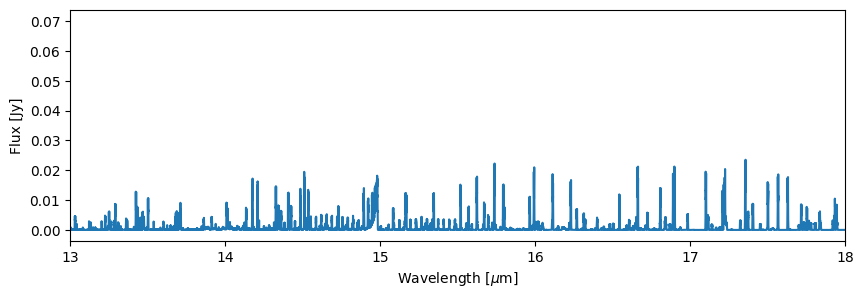

In [223]:
fig,ax = plt.subplots(figsize=(10,3))
ax.plot(model.FLiTsSpec.wl,model.FLiTsSpec.flux - model.FLiTsSpec.flux_cont)
ax.set_ylabel('Flux [Jy]')
ax.set_xlabel(r'Wavelength [$\mu$m]')
ax.set_xlim(13,18)

PLOT: plot_avgabun ...
PLOT: plot_abunvert ...


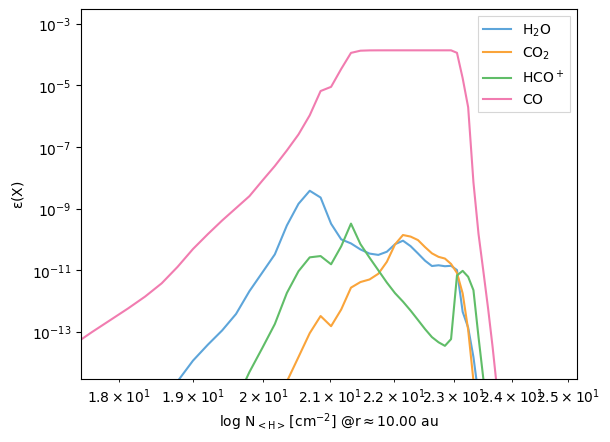

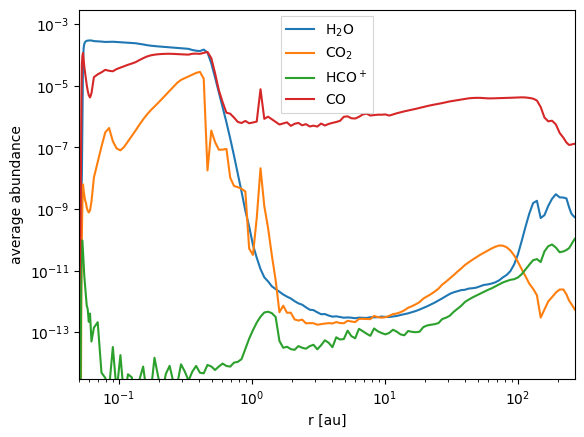

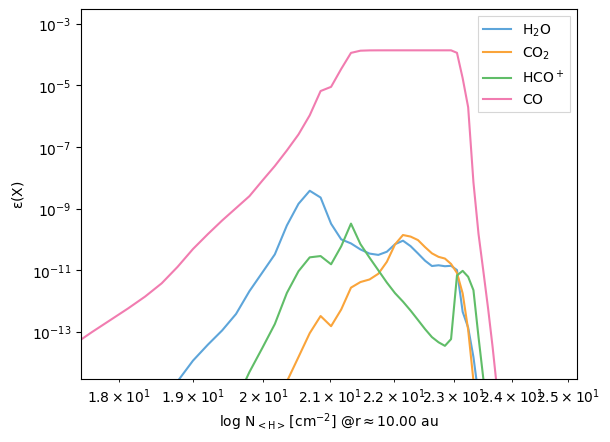

In [14]:
pp=pplot.Plot(None)
species = ["H2O", "CO2", "HCO+", "CO"]
pp.plot_avgabun(model, species,ylim=[3.e-15,3.e-3], xlog=True)
pp.plot_abunvert(model, 10, species,ylim=[3.e-15,3.e-3], xlog=True)

28.00451028


(-0.003622074049999957, 0.03)

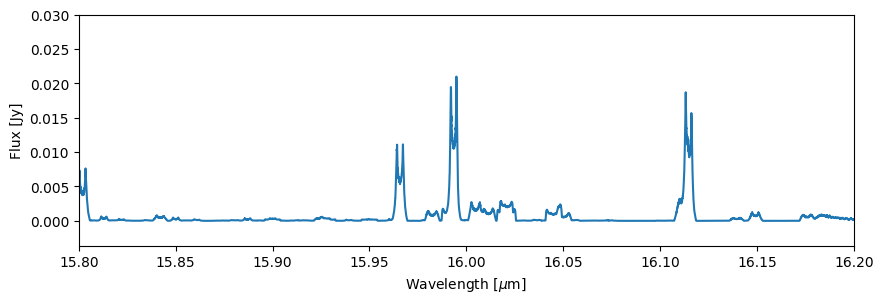

In [209]:
fig,ax = plt.subplots(figsize=(10,3))
ax.plot(model.FLiTsSpec.wl,model.FLiTsSpec.flux - model.FLiTsSpec.flux_cont)
print(max(model.FLiTsSpec.wl))
# spec=model.gen_specFromLineEstimates(ident='HCN_H',wlrange=[15.95,16.05],unit="Jy",specR=10000,noCont=True)
# ax.plot(spec[0],spec[1],label='HCN_H')
ax.set_ylabel('Flux [Jy]')
ax.set_xlabel(r'Wavelength [$\mu$m]')
ax.set_xlim(15.8,16.2)
ax.set_ylim(None, 0.03)

INFO: gen_specFromLineEstimates: build spectrum for 31105 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  5.24 s


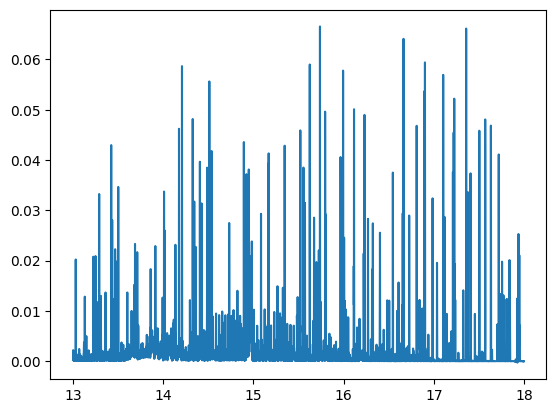

ERROR: Could not find and line estimates ...
[15.73747896 16.66307032 14.5122918  17.35674178 15.62457417 15.99351257
 16.90034933 17.1022978  14.32832856 14.20960837 15.79474946 16.89135898
 14.17640793 16.11475205 13.4255514  17.22468953 16.2308794  14.89452629
 14.53790713 15.34656696 17.56772216]


In [224]:
wlrange = [13, 18]
specHRnocont = model.gen_specFromLineEstimates(wlrange=wlrange, unit="Jy", specR=10000, noCont=True)
plt.plot(specHRnocont[0], specHRnocont[1])
plt.show()
wl_array = model.FLiTsSpec.wl
flux_array = model.FLiTsSpec.flux - model.FLiTsSpec.flux_cont


def gaussian(x, a, mu, sigma, offset):
    return a * (np.exp(-(x - mu + offset) ** 2 / (2 * sigma ** 2)) + np.exp(-(x - mu - offset) ** 2 / (2 * sigma ** 2)))


waterlines = model.selectLineEstimates(ident="o-H2O", wlrange=wlrange) + model.selectLineEstimates(ident="p-H2O",
                                                                                                   wlrange=wlrange)
co2lines = model.selectLineEstimates(ident="CO2", wlrange=wlrange)
waterlines = sorted(waterlines, key=lambda x: x.flux, reverse=True)[:21]
lines = np.zeros(len(waterlines))
for index, waterline in enumerate(waterlines):
    lines[index] = waterline.wl
print(lines)
copy_flux = flux_array.copy()
# lines = [15.9657591]
# for line in tqdm(lines):
#     popt, pcov = curve_fit(gaussian, wl_array, copy_flux, p0=[0.01, line, 0.001, 0.0005])
#     plt.plot(wl_array, gaussian(wl_array, *popt), c='orange')
#     copy_flux -= gaussian(wl_array, *popt)
# plt.plot(wl_array, flux_array)
# plt.xlim(wlrange)
# plt.ylim(None, 0.06)
# plt.show()

(-0.003622074049999957, 0.03)

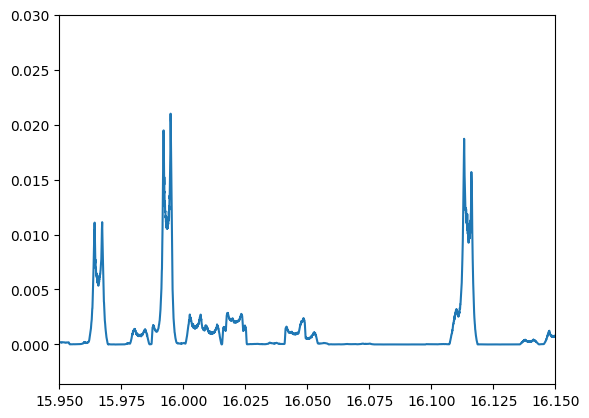

In [17]:
plt.plot(wl_array, copy_flux)
plt.xlim(15.95, 16.15)
plt.ylim(None, 0.03)

In [21]:
print(model.species)

Number of species: 328
Name             mass [g]   charge chemPot [eV]
e-               9.11e-28    -1       0.0000
H                1.67e-24     0       0.0000
H+               1.67e-24     1      13.5979
H-               1.67e-24    -1      -0.7545
H2               3.35e-24     0      -4.4774
H2+              3.35e-24     1      10.9478
H3+              5.02e-24     1       4.7572
H2exc            3.35e-24     0      -1.8774
He               6.65e-24     0       0.0000
He+              6.65e-24     1      24.5840
HeH+             8.32e-24     1      11.7738
C                1.99e-23     0       0.0000
C+               1.99e-23     1      11.2597
C++              1.99e-23     2      35.6427
CH               2.16e-23     0      -3.4689
CH+              2.16e-23     1       7.1710
CH2              2.33e-23     0      -7.8064
CH2+             2.33e-23     1       2.5164
CH3              2.50e-23     0     -12.5428
CH3+             2.50e-23     1      -2.7071
CH4              2.66e-23    

In [ ]:
def convolve(wl, flux, specR, sample=1):
    print("INFO: convolve FLiTs spectrum ... ")

    from astropy.convolution import convolve_fft
    from astropy.convolution import Gaussian1DKernel

    # Make a new wl grid
    wl_log=np.logspace(np.log10(np.nanmin(wl)),np.log10(np.nanmax(wl)),num=np.size(wl)*sample)

    # Find stddev of Gaussian kernel for smoothing
    # taken from here https://github.com/spacetelescope/pysynphot/issues/78
    R_grid=(wl_log[1:-1]+wl_log[0:-2])/(wl_log[1:-1]-wl_log[0:-2])/2
    sigma=np.median(R_grid)/specR
    if sigma<1:
      sigma=1

    # Interpolate on logarithmic grid
    f_log=np.interp(wl_log,wl,flux)

    # in the idl script this is interpreted as the FWHM,
    # but the convolution routine wants stddev use relation
    # FWHM=2*sqrt(2ln2)*stddev=2.355/stddev
    # this should than be consistent with the result from the
    # ProDiMo idl script
    gauss=Gaussian1DKernel(stddev=sigma/2.355)
    flux_conv=convolve_fft(f_log,gauss)

    # Interpolate back on original wavelength grid
    flux_sm=np.interp(wl,wl_log,flux_conv)

    cut=2*int(sigma)
    flux_smc=flux_sm[cut:(len(flux_sm)-cut)]
    wlc=wl[cut:(len(wl)-cut)]

    return wlc,flux_smc

    

INFO: convolve FLiTs spectrum ... 
INFO: convolve FLiTs spectrum ... 


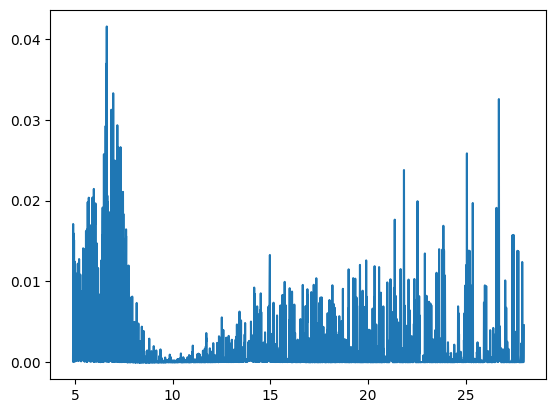

In [228]:
wl, flux = model.FLiTsSpec.wl, model.FLiTsSpec.flux_cont
_, flux_con = model.FLiTsSpec.convolve(3000)
wl, cont_flux = convolve(wl, flux, 3000)
flux = flux_con-cont_flux
plt.plot(wl, flux)
# plt.xlim(15.975, 15.999)
new_wl = wl[(wl>=15.95)&(wl<=15.975)]
new_flux = flux[(wl>=15.95)&(wl<=15.975)]
# plt.ylim(0.37, 0.4)

100%|██████████| 1/1 [00:00<00:00,  3.34it/s]


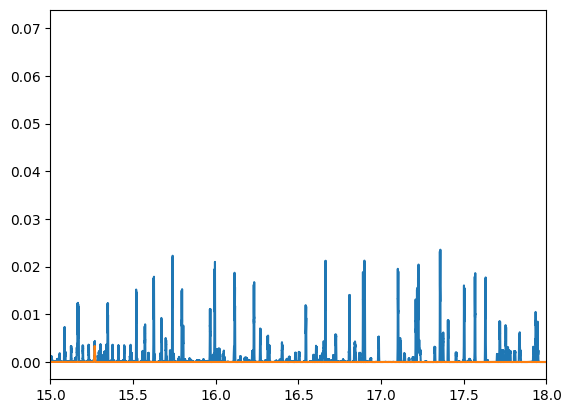

In [225]:
wlrange = [15, 18]

waterlines = model.selectLineEstimates(ident="o-H2O", wlrange=wlrange) + model.selectLineEstimates(ident="p-H2O",
                                                                                                   wlrange=wlrange)
waterlines = sorted(waterlines, key=lambda x: x.flux, reverse=True)[:5]
lines_h2o = np.zeros(len(waterlines))
for index, waterline in enumerate(waterlines):
    lines_h2o[index] = waterline.wl

co2lines = model.selectLineEstimates(ident="CO2_H", wlrange=wlrange)
co2lines = sorted(co2lines, key=lambda x: x.flux, reverse=True)[:1]
lines_co2 = np.zeros(len(co2lines))
for index, co2line in enumerate(co2lines):
    lines_co2[index] = co2line.wl

c2h2lines = model.selectLineEstimates(ident="C2H2_H", wlrange=wlrange)
c2h2lines = sorted(c2h2lines, key=lambda x: x.flux, reverse=True)[:1]
lines_c2h2 = np.zeros(len(c2h2lines))
for index, c2h2line in enumerate(c2h2lines):
    lines_c2h2[index] = c2h2line.wl

plt.plot(wl_array, flux_array)
for line in tqdm(lines_co2):
    popt, pcov = curve_fit(gaussian, wl_array[(wl_array >= line - 0.01) & (wl_array <= line + 0.01)],
                           flux_array[(wl_array >= line - 0.01) & (wl_array <= line + 0.01)],
                           p0=[0.01, line, 0.001, 1.3e-3])
    plt.plot(wl_array, gaussian(wl_array, *popt), label=line)
    # print(popt)

plt.xlim(wlrange)
plt.show()

Number of species: 328
Name             mass [g]   charge chemPot [eV]
e-               9.11e-28    -1       0.0000
H                1.67e-24     0       0.0000
H+               1.67e-24     1      13.5979
H-               1.67e-24    -1      -0.7545
H2               3.35e-24     0      -4.4774
H2+              3.35e-24     1      10.9478
H3+              5.02e-24     1       4.7572
H2exc            3.35e-24     0      -1.8774
He               6.65e-24     0       0.0000
He+              6.65e-24     1      24.5840
HeH+             8.32e-24     1      11.7738
C                1.99e-23     0       0.0000
C+               1.99e-23     1      11.2597
C++              1.99e-23     2      35.6427
CH               2.16e-23     0      -3.4689
CH+              2.16e-23     1       7.1710
CH2              2.33e-23     0      -7.8064
CH2+             2.33e-23     1       2.5164
CH3              2.50e-23     0     -12.5428
CH3+             2.50e-23     1      -2.7071
CH4              2.66e-23    

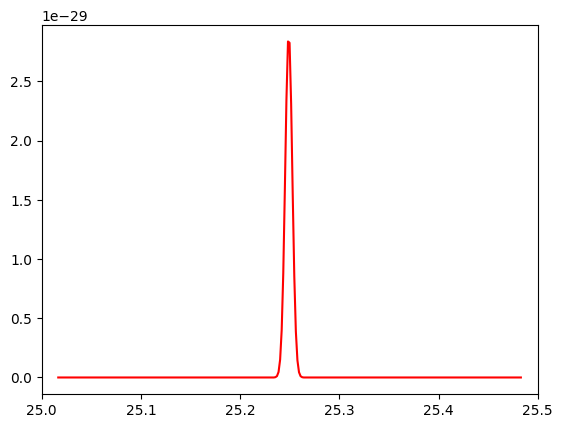

In [204]:
print(model.species)
molecule_spec = model.gen_specFromLineEstimates(ident='S', wlrange=wlrange, noCont=True)
plt.plot(molecule_spec[0], molecule_spec[1], 'r')
plt.xlim(wlrange)
plt.show()

O
INFO: gen_specFromLineEstimates: build spectrum for 30 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.91 s


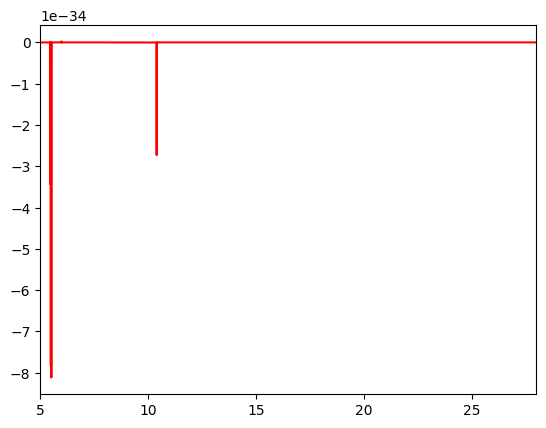

CO2_H
INFO: gen_specFromLineEstimates: build spectrum for 5746 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  10.79 s


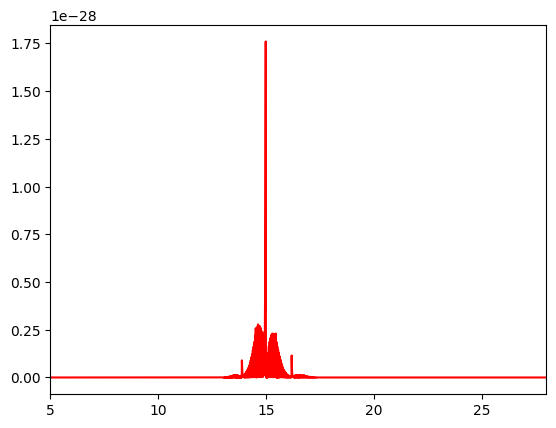

OH
INFO: gen_specFromLineEstimates: build spectrum for 216 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  2.16 s


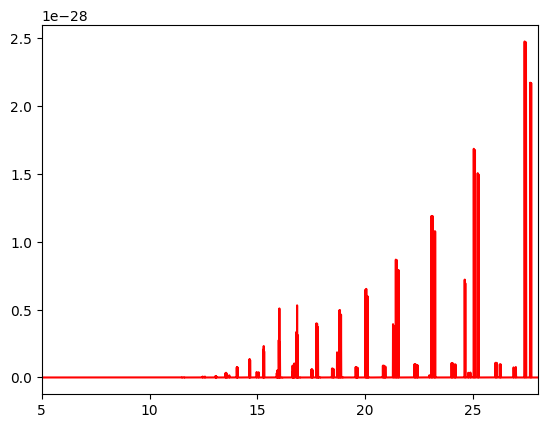

C18O
ERROR: Could not find and line estimates ...
INFO: gen_specFromLineEstimates: build spectrum for 0 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.83 s


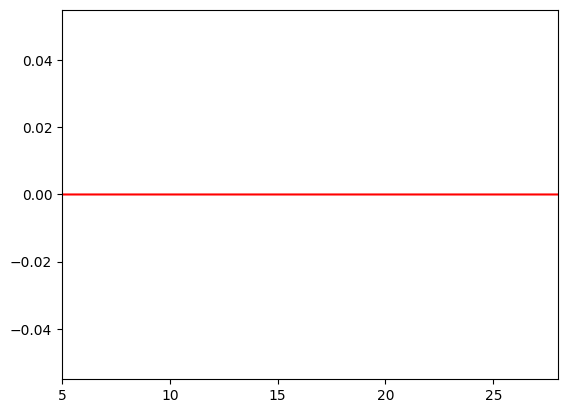

CH
INFO: gen_specFromLineEstimates: build spectrum for 4 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.85 s


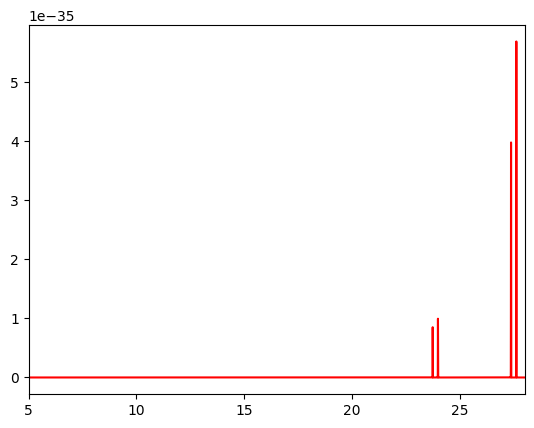

SO2
ERROR: Could not find and line estimates ...
INFO: gen_specFromLineEstimates: build spectrum for 0 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.80 s


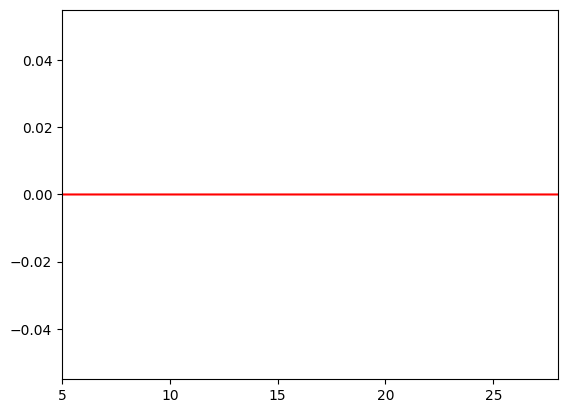

N+
ERROR: Could not find and line estimates ...
INFO: gen_specFromLineEstimates: build spectrum for 0 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.83 s


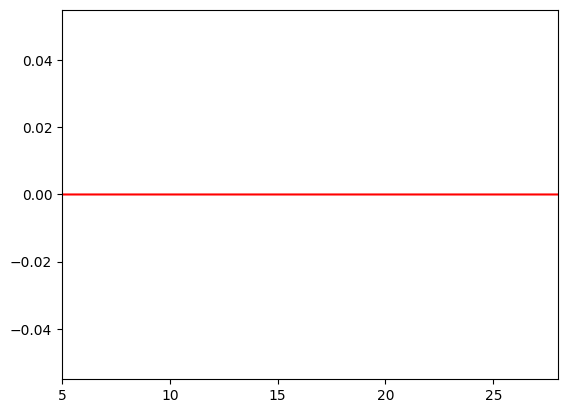

S+
ERROR: Could not find and line estimates ...
INFO: gen_specFromLineEstimates: build spectrum for 0 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.83 s


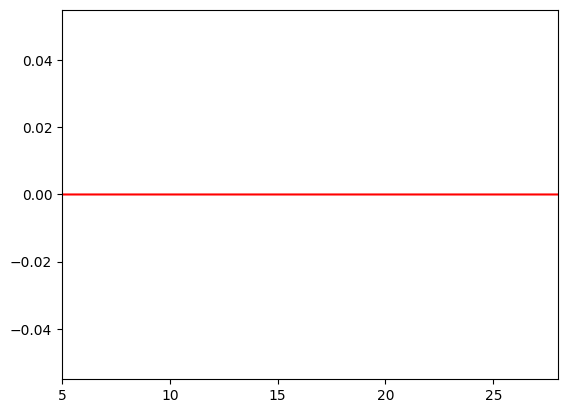

o-NH3
ERROR: Could not find and line estimates ...
INFO: gen_specFromLineEstimates: build spectrum for 0 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.81 s


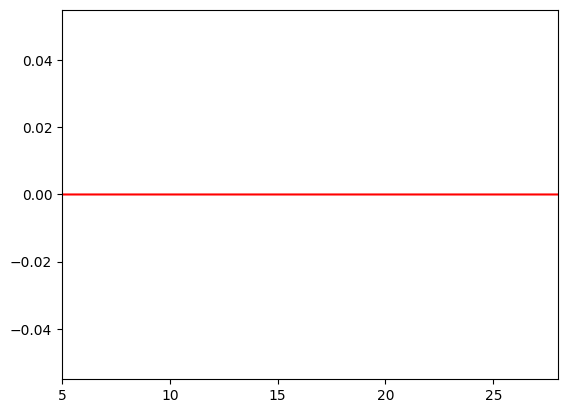

O2_H
INFO: gen_specFromLineEstimates: build spectrum for 435 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  2.47 s


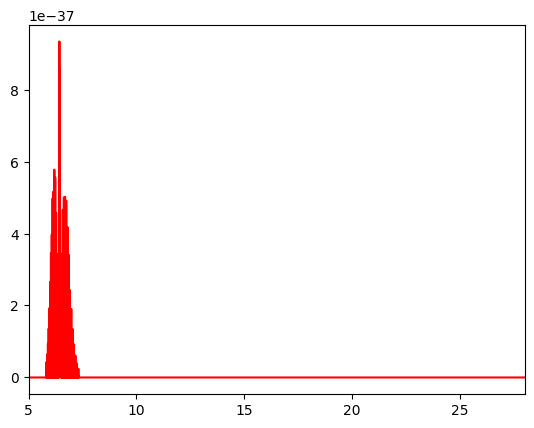

SiO
ERROR: Could not find and line estimates ...
INFO: gen_specFromLineEstimates: build spectrum for 0 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.80 s


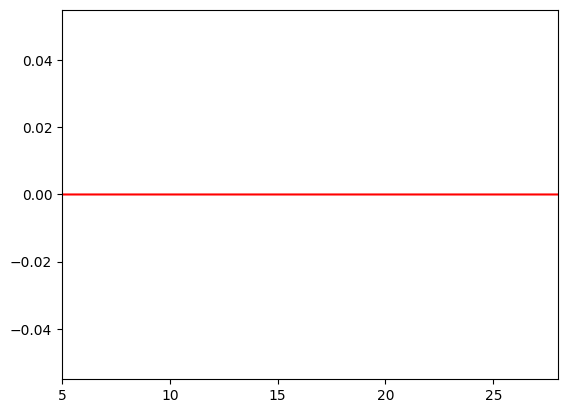

NO
ERROR: Could not find and line estimates ...
INFO: gen_specFromLineEstimates: build spectrum for 0 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.80 s


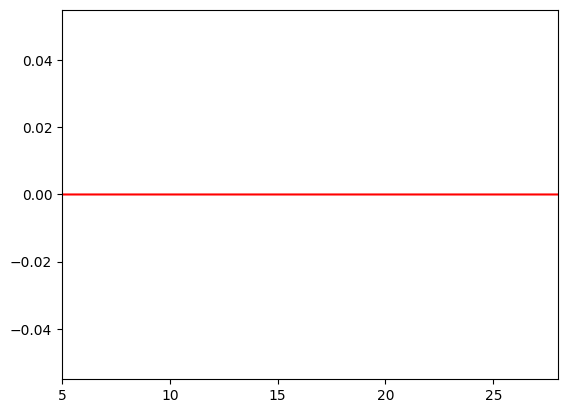

o-H2O
INFO: gen_specFromLineEstimates: build spectrum for 3661 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  7.18 s


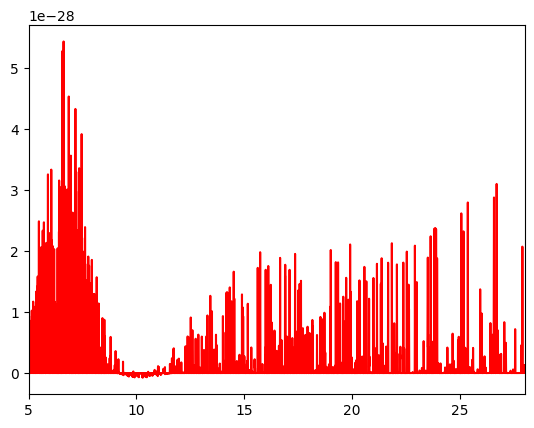

o-H3O+
ERROR: Could not find and line estimates ...
INFO: gen_specFromLineEstimates: build spectrum for 0 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.81 s


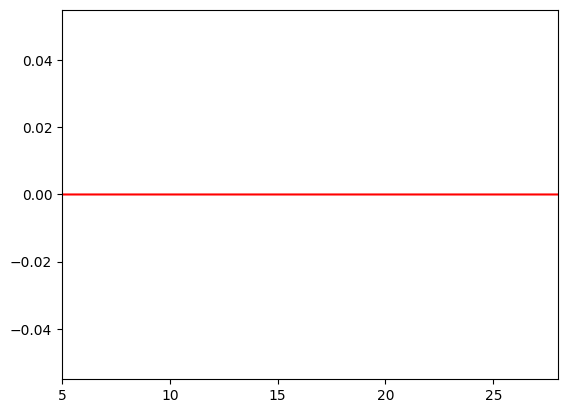

HCS+
ERROR: Could not find and line estimates ...
INFO: gen_specFromLineEstimates: build spectrum for 0 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.84 s


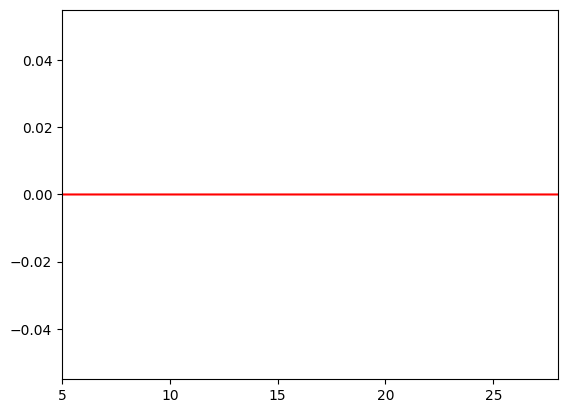

p-H2O
INFO: gen_specFromLineEstimates: build spectrum for 3480 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  7.45 s


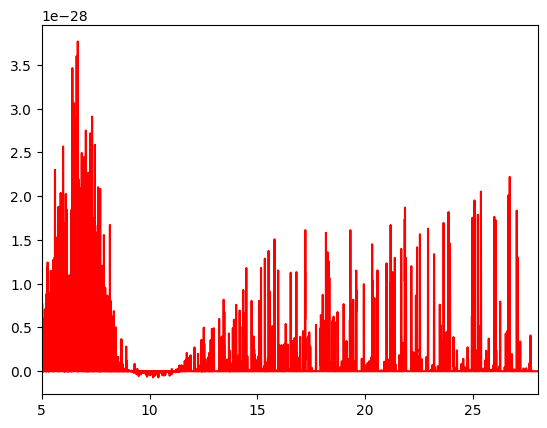

N2H+
ERROR: Could not find and line estimates ...
INFO: gen_specFromLineEstimates: build spectrum for 0 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.84 s


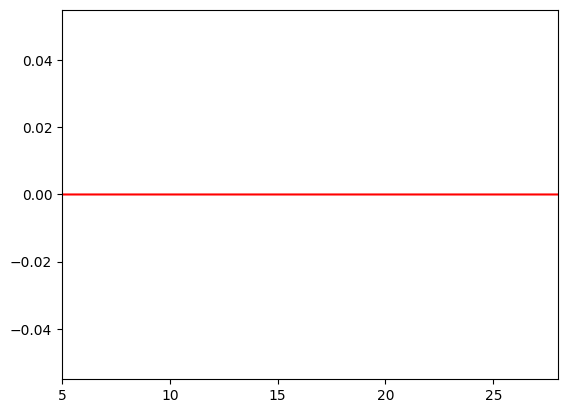

SO2_H
INFO: gen_specFromLineEstimates: build spectrum for 8230 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  14.43 s


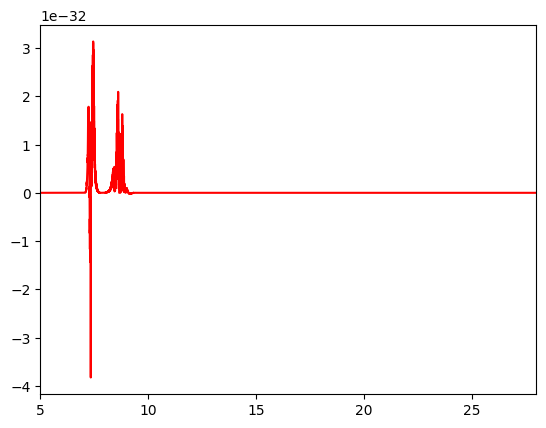

CO
INFO: gen_specFromLineEstimates: build spectrum for 97 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  2.05 s


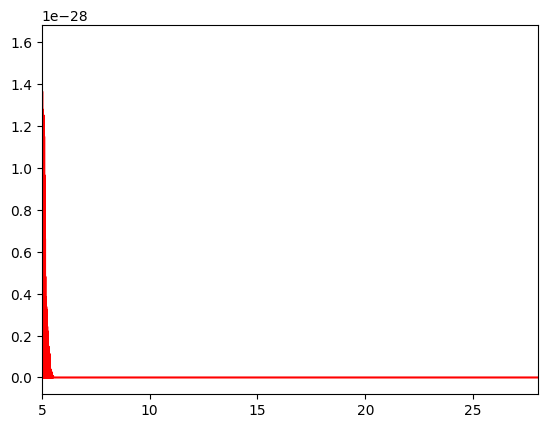

o-H2CO
ERROR: Could not find and line estimates ...
INFO: gen_specFromLineEstimates: build spectrum for 0 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.88 s


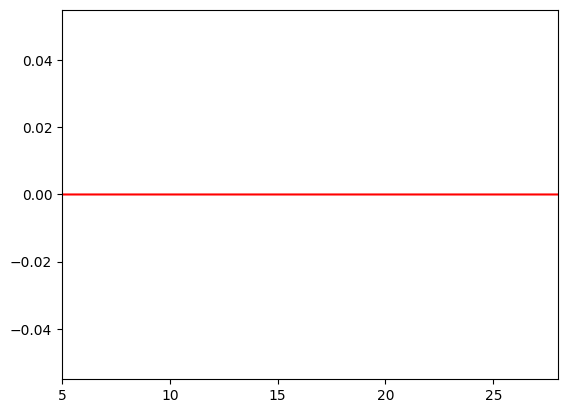

Mg+
ERROR: Could not find and line estimates ...
INFO: gen_specFromLineEstimates: build spectrum for 0 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.85 s


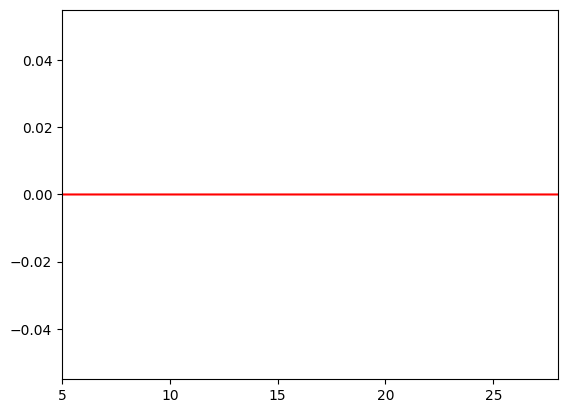

CS
ERROR: Could not find and line estimates ...
INFO: gen_specFromLineEstimates: build spectrum for 0 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.82 s


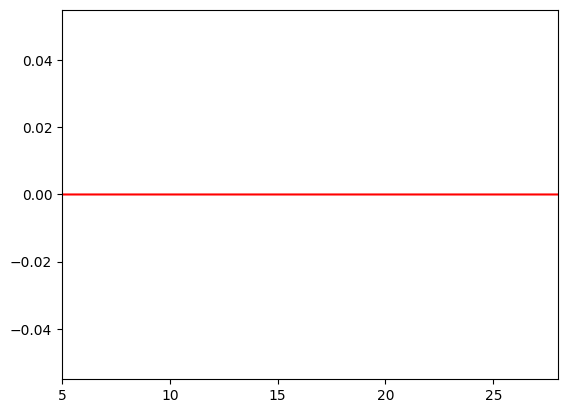

p-H2CO
ERROR: Could not find and line estimates ...
INFO: gen_specFromLineEstimates: build spectrum for 0 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.82 s


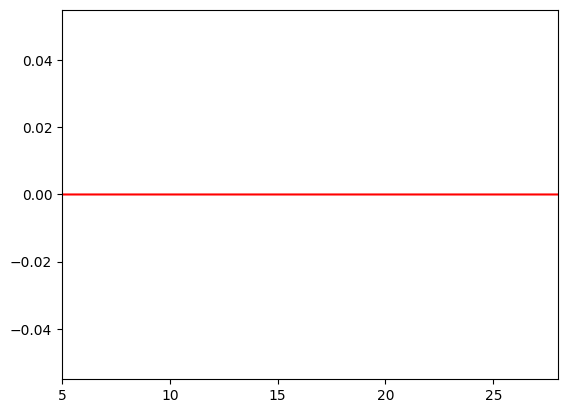

CO+
ERROR: Could not find and line estimates ...
INFO: gen_specFromLineEstimates: build spectrum for 0 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.81 s


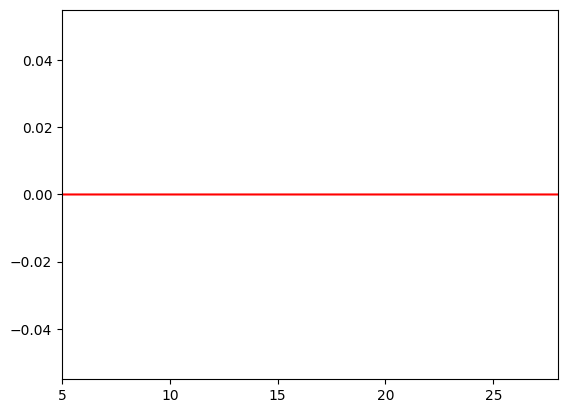

O2
ERROR: Could not find and line estimates ...
INFO: gen_specFromLineEstimates: build spectrum for 0 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.99 s


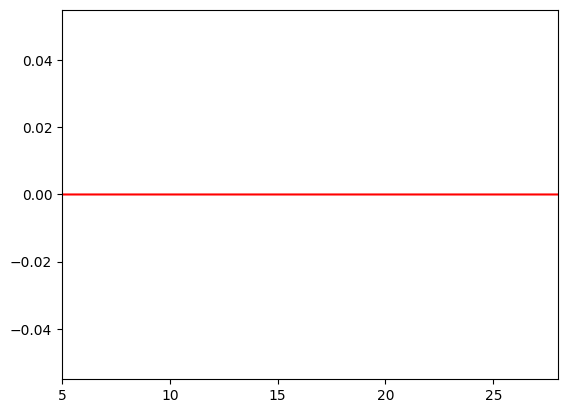

Ar++
INFO: gen_specFromLineEstimates: build spectrum for 3 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.81 s


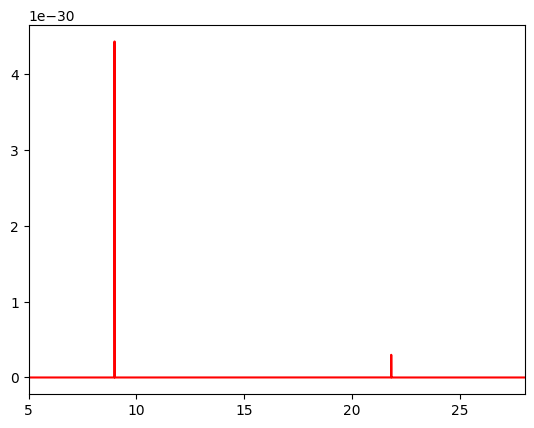

C+
ERROR: Could not find and line estimates ...
INFO: gen_specFromLineEstimates: build spectrum for 0 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.81 s


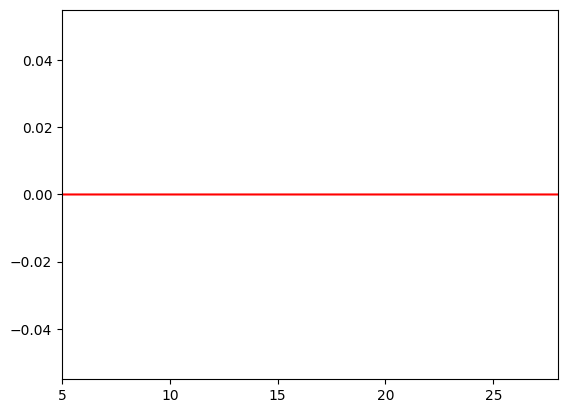

NO_H
INFO: gen_specFromLineEstimates: build spectrum for 4076 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  7.46 s


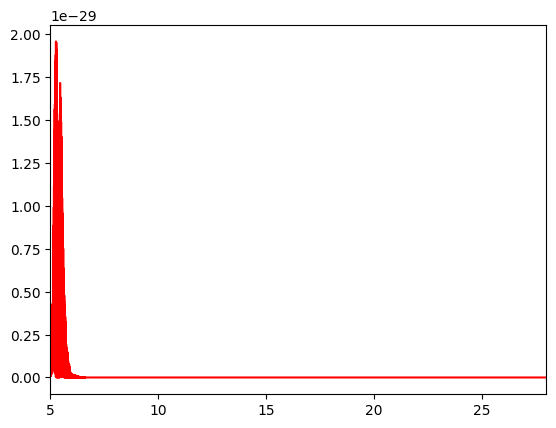

CN
ERROR: Could not find and line estimates ...
INFO: gen_specFromLineEstimates: build spectrum for 0 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.86 s


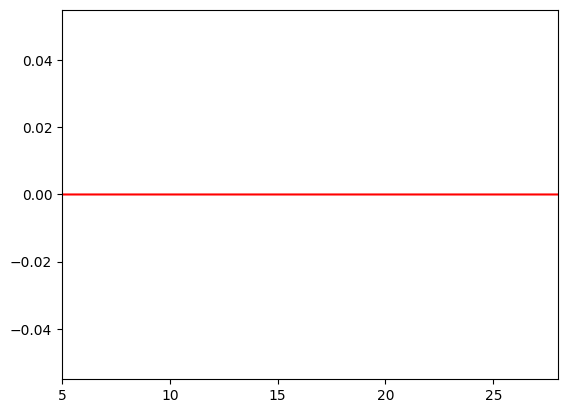

Si+
INFO: gen_specFromLineEstimates: build spectrum for 3 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.83 s


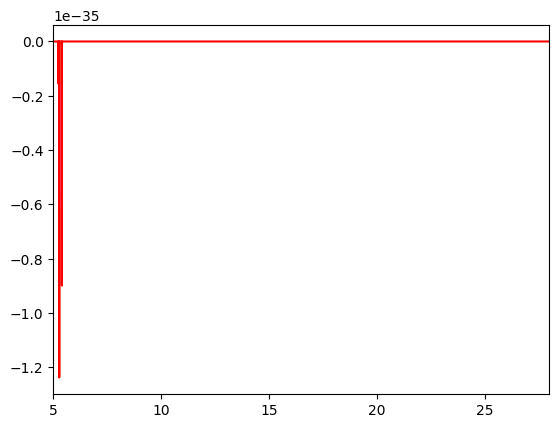

o-CH2
ERROR: Could not find and line estimates ...
INFO: gen_specFromLineEstimates: build spectrum for 0 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.81 s


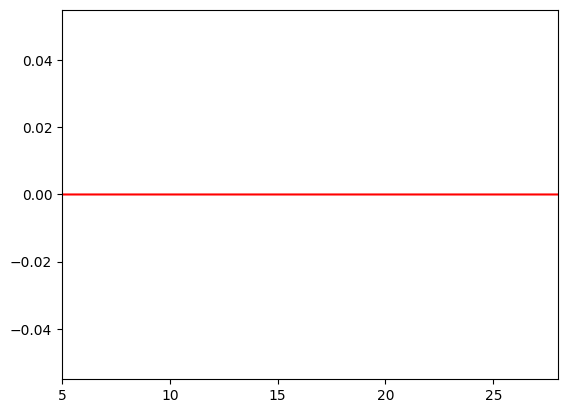

HN13C
ERROR: Could not find and line estimates ...
INFO: gen_specFromLineEstimates: build spectrum for 0 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.82 s


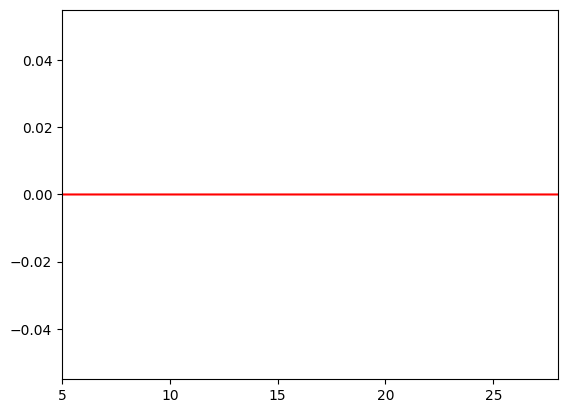

p-H3O+
ERROR: Could not find and line estimates ...
INFO: gen_specFromLineEstimates: build spectrum for 0 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.82 s


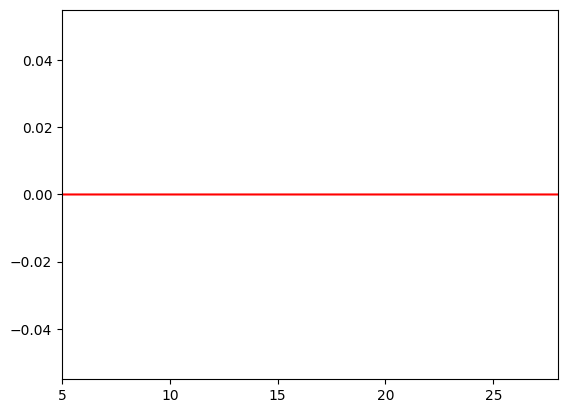

CH+
INFO: gen_specFromLineEstimates: build spectrum for 2 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.85 s


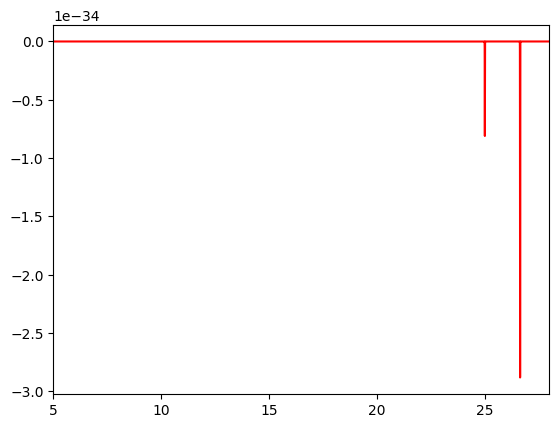

C2H
ERROR: Could not find and line estimates ...
INFO: gen_specFromLineEstimates: build spectrum for 0 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.86 s


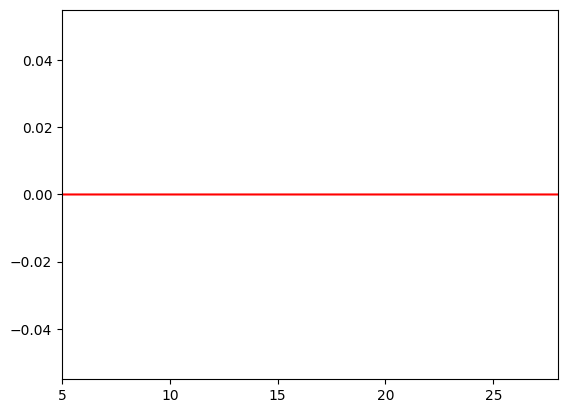

HCN
ERROR: Could not find and line estimates ...
INFO: gen_specFromLineEstimates: build spectrum for 0 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.83 s


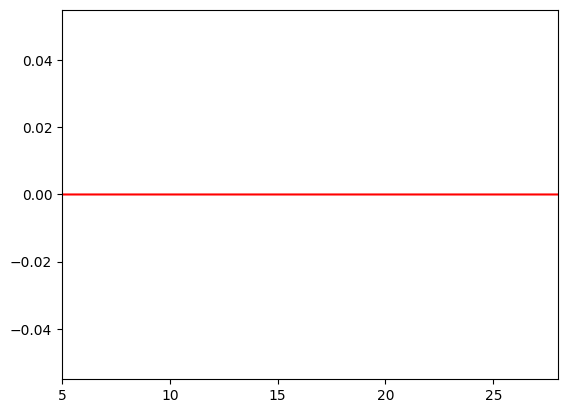

A-CH3OH
ERROR: Could not find and line estimates ...
INFO: gen_specFromLineEstimates: build spectrum for 0 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.87 s


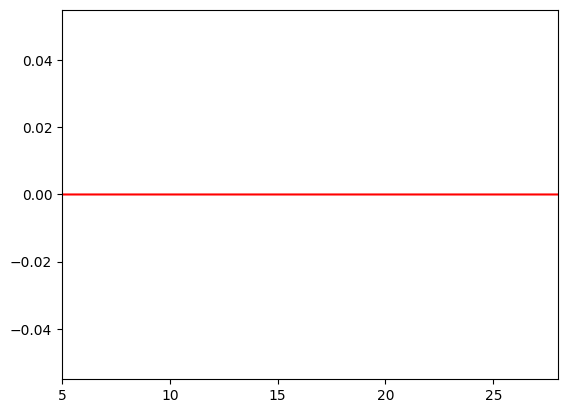

S
INFO: gen_specFromLineEstimates: build spectrum for 2 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.84 s


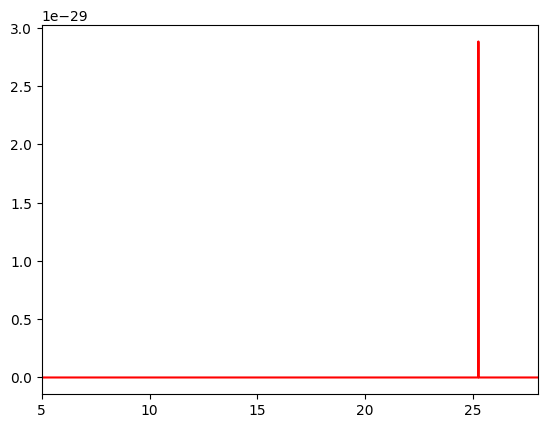

C17O
ERROR: Could not find and line estimates ...
INFO: gen_specFromLineEstimates: build spectrum for 0 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.85 s


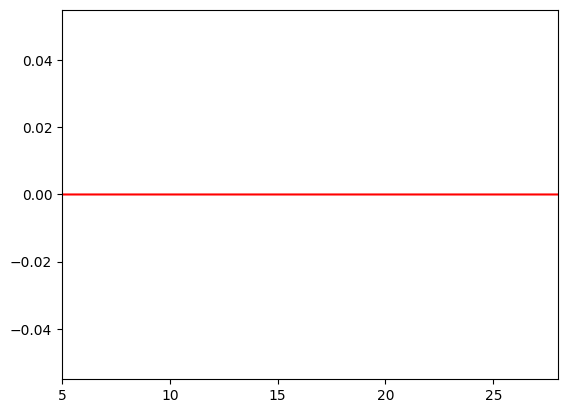

E-CH3OH
ERROR: Could not find and line estimates ...
INFO: gen_specFromLineEstimates: build spectrum for 0 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.83 s


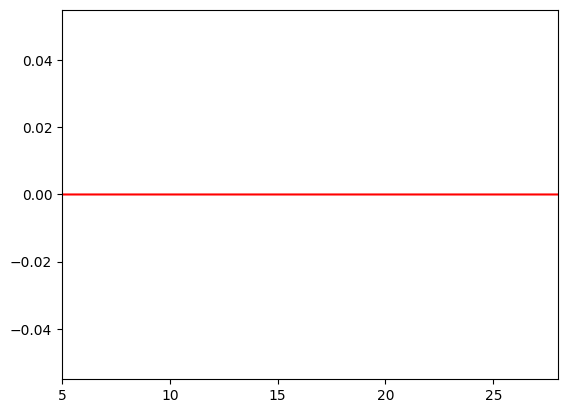

HCN_H
INFO: gen_specFromLineEstimates: build spectrum for 5753 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  10.61 s


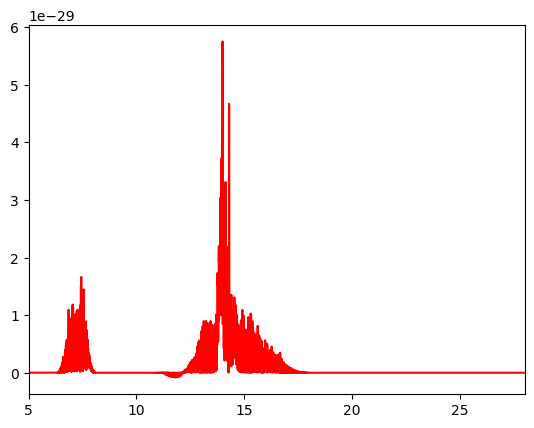

p-C3H2
ERROR: Could not find and line estimates ...
INFO: gen_specFromLineEstimates: build spectrum for 0 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.84 s


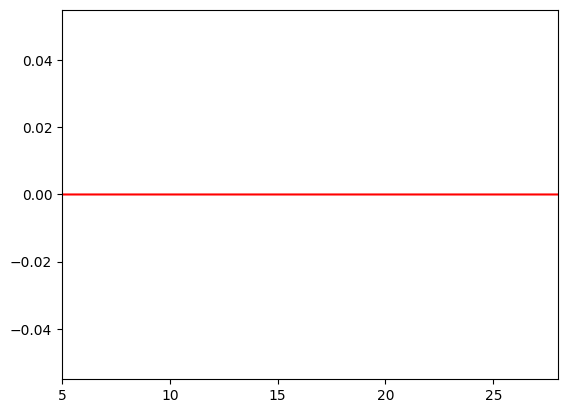

HNC
ERROR: Could not find and line estimates ...
INFO: gen_specFromLineEstimates: build spectrum for 0 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.82 s


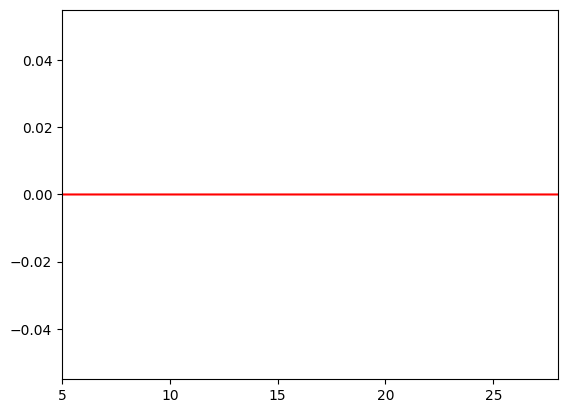

p-NH3
ERROR: Could not find and line estimates ...
INFO: gen_specFromLineEstimates: build spectrum for 0 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.86 s


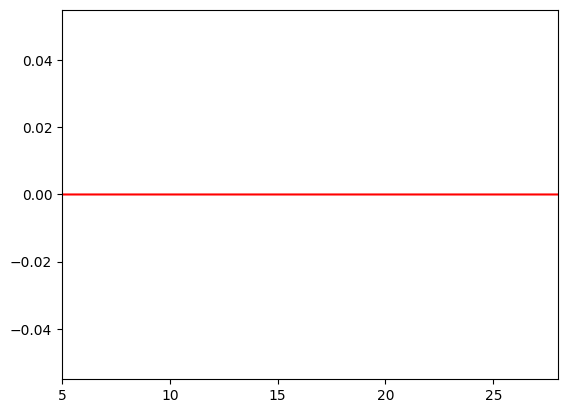

OCS
ERROR: Could not find and line estimates ...
INFO: gen_specFromLineEstimates: build spectrum for 0 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.83 s


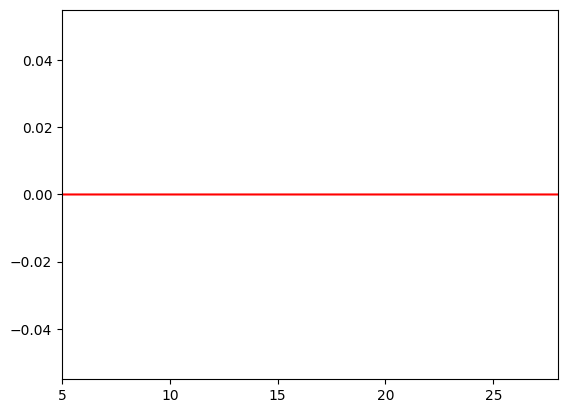

13CO
ERROR: Could not find and line estimates ...
INFO: gen_specFromLineEstimates: build spectrum for 0 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.81 s


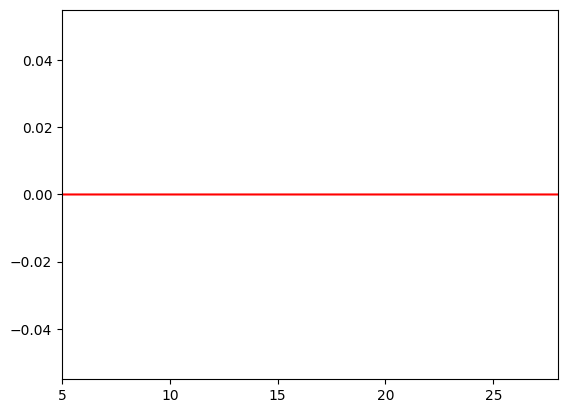

NH3_H
INFO: gen_specFromLineEstimates: build spectrum for 8510 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  14.79 s


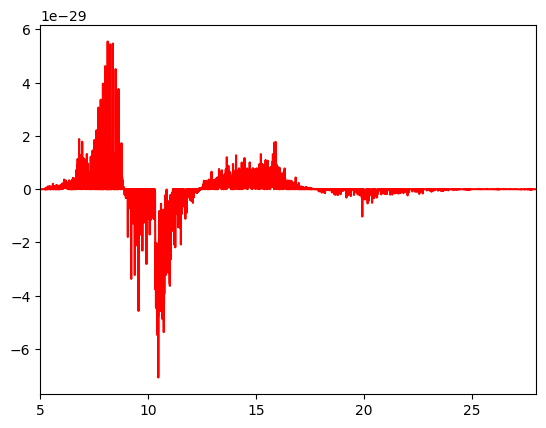

S++
INFO: gen_specFromLineEstimates: build spectrum for 2 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.82 s


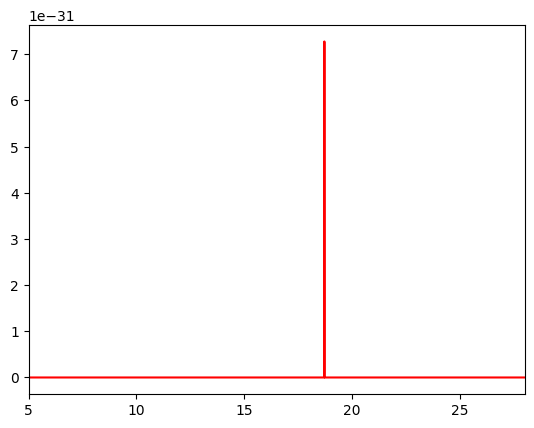

CH4_H
INFO: gen_specFromLineEstimates: build spectrum for 9662 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  15.96 s


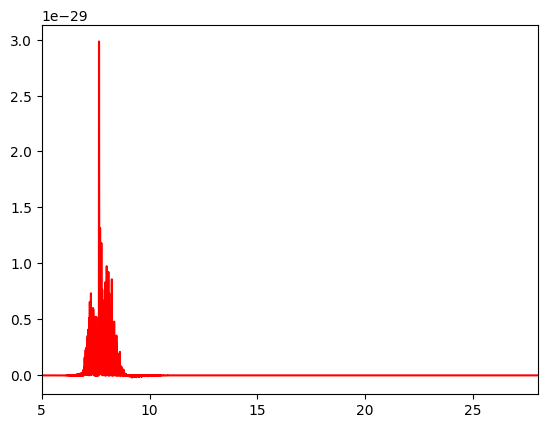

o-C3H2
ERROR: Could not find and line estimates ...
INFO: gen_specFromLineEstimates: build spectrum for 0 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.81 s


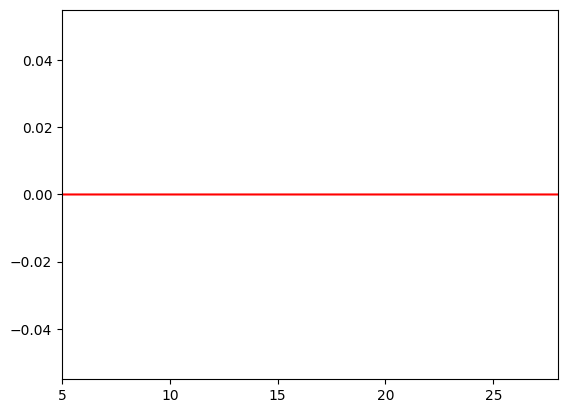

OH-hfs
ERROR: Could not find and line estimates ...
INFO: gen_specFromLineEstimates: build spectrum for 0 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.82 s


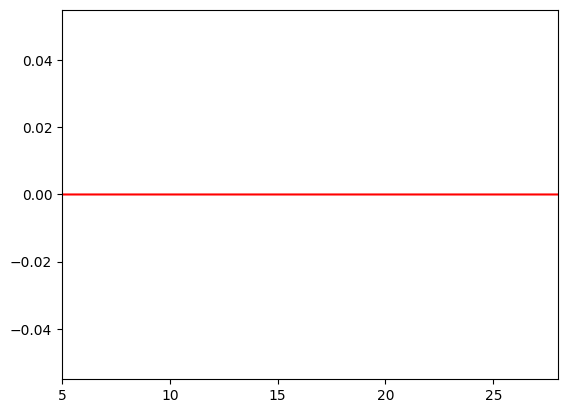

Ne+
INFO: gen_specFromLineEstimates: build spectrum for 1 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.82 s


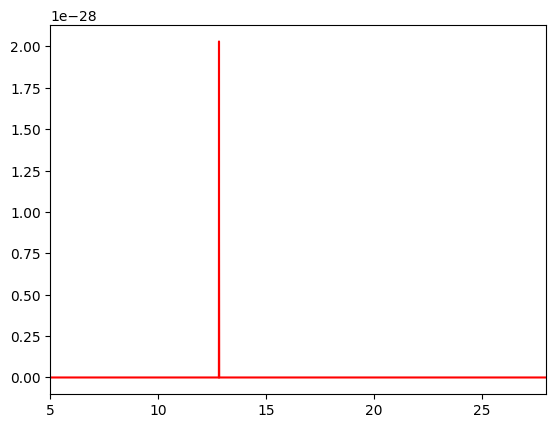

O++
ERROR: Could not find and line estimates ...
INFO: gen_specFromLineEstimates: build spectrum for 0 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.81 s


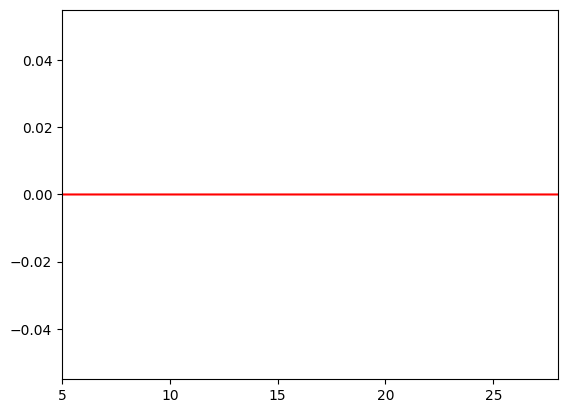

O+
ERROR: Could not find and line estimates ...
INFO: gen_specFromLineEstimates: build spectrum for 0 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.81 s


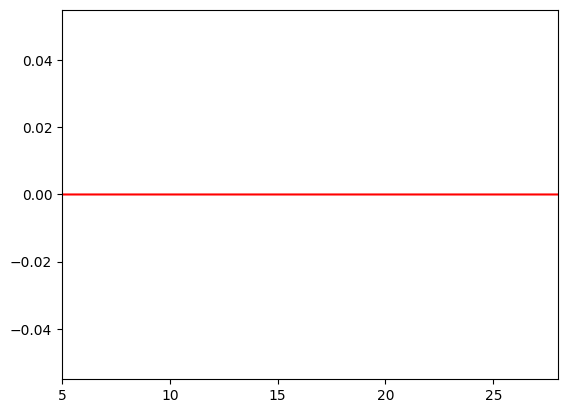

OH+
INFO: gen_specFromLineEstimates: build spectrum for 2 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.82 s


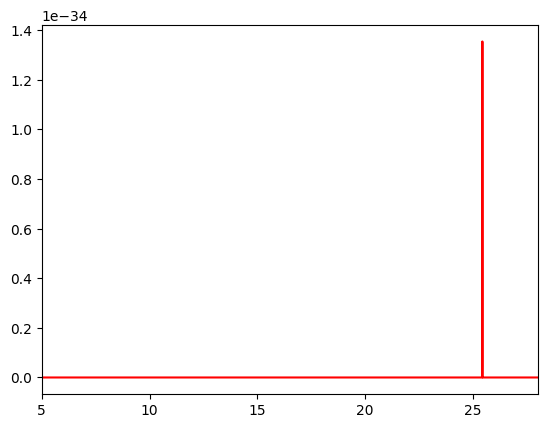

p-H2
INFO: gen_specFromLineEstimates: build spectrum for 74 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.93 s


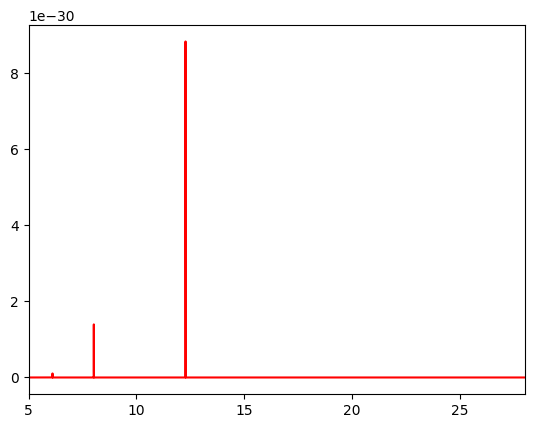

C2H2_H
INFO: gen_specFromLineEstimates: build spectrum for 26457 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  41.63 s


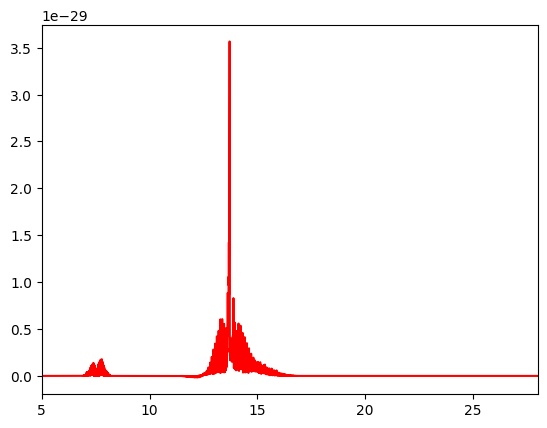

p-H2S
ERROR: Could not find and line estimates ...
INFO: gen_specFromLineEstimates: build spectrum for 0 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.84 s


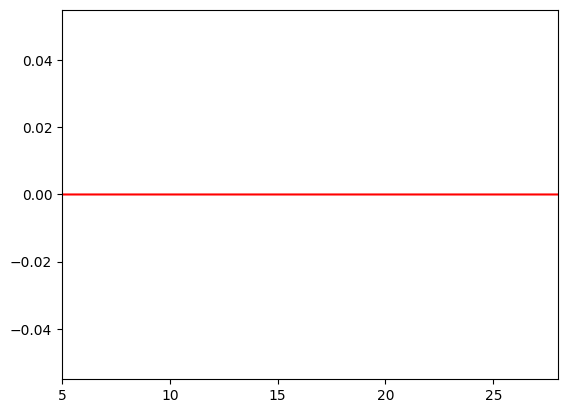

p-CH2
ERROR: Could not find and line estimates ...
INFO: gen_specFromLineEstimates: build spectrum for 0 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.86 s


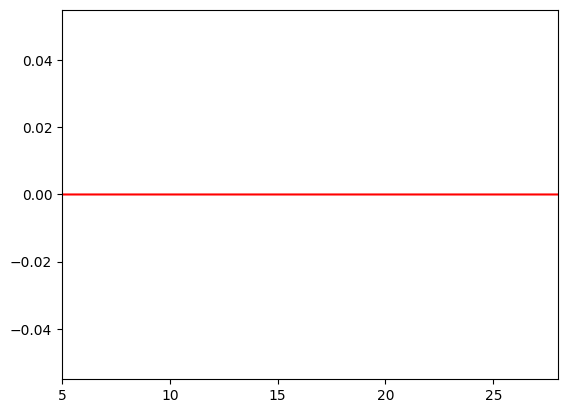

o-H2
INFO: gen_specFromLineEstimates: build spectrum for 83 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.98 s


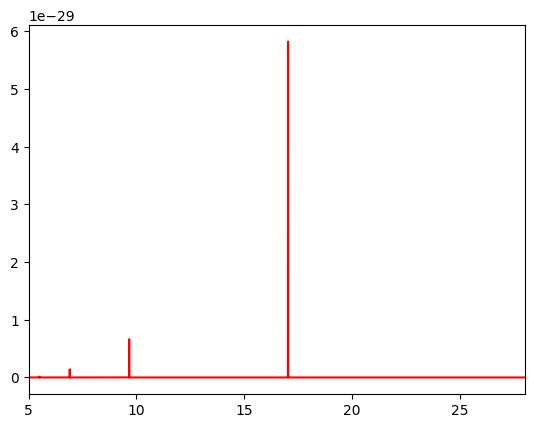

N++
ERROR: Could not find and line estimates ...
INFO: gen_specFromLineEstimates: build spectrum for 0 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.81 s


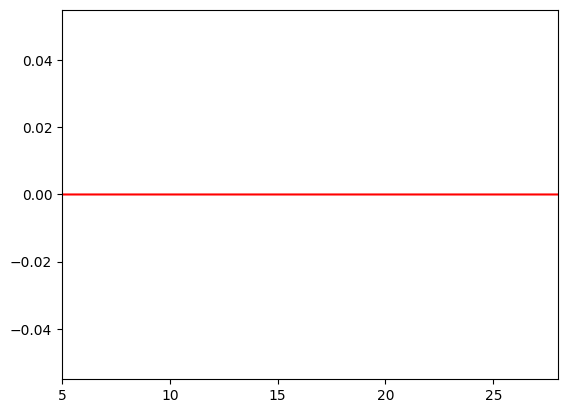

o-H2S
ERROR: Could not find and line estimates ...
INFO: gen_specFromLineEstimates: build spectrum for 0 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.84 s


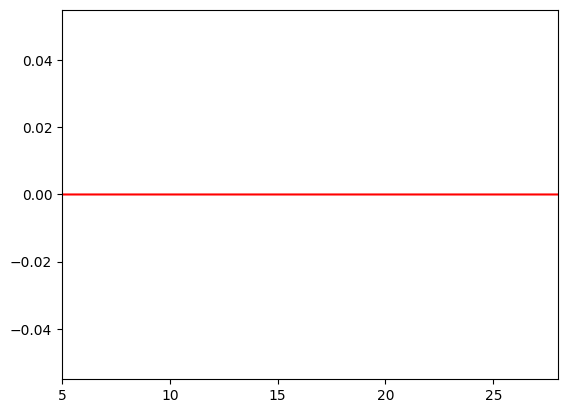

HCO+
ERROR: Could not find and line estimates ...
INFO: gen_specFromLineEstimates: build spectrum for 0 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.83 s


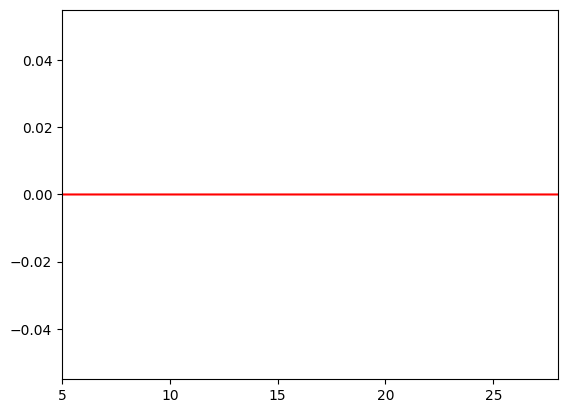

C
ERROR: Could not find and line estimates ...
INFO: gen_specFromLineEstimates: build spectrum for 0 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.81 s


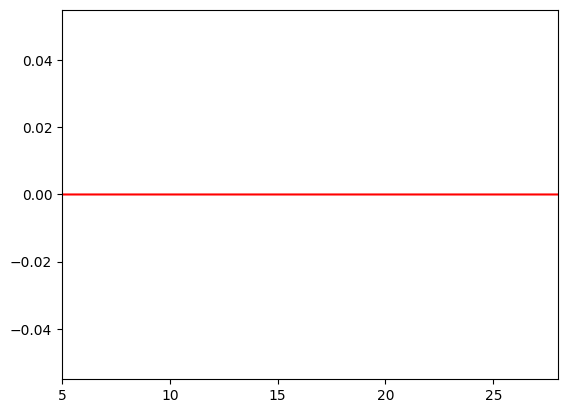

H13CO+
ERROR: Could not find and line estimates ...
INFO: gen_specFromLineEstimates: build spectrum for 0 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.86 s


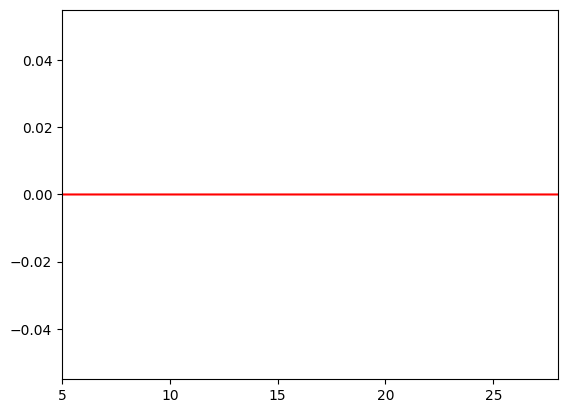

SH+
INFO: gen_specFromLineEstimates: build spectrum for 4 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.83 s


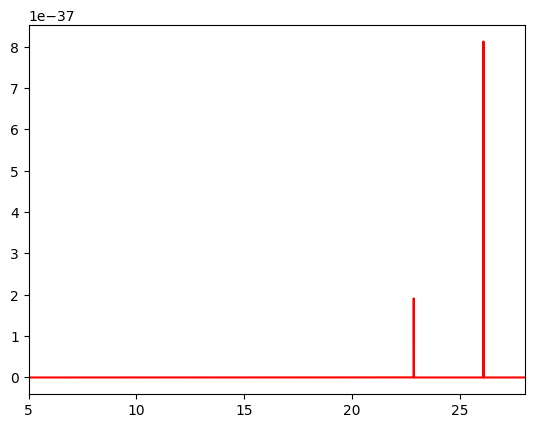

Ar+
INFO: gen_specFromLineEstimates: build spectrum for 1 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.81 s


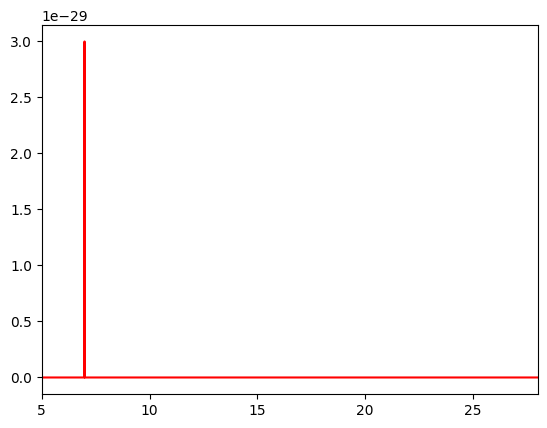

Ne++
INFO: gen_specFromLineEstimates: build spectrum for 2 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.83 s


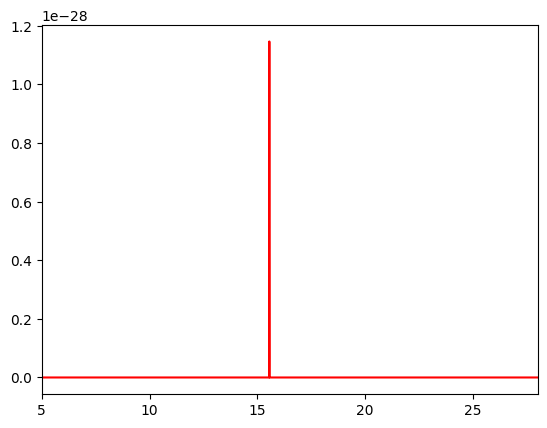

Fe+
INFO: gen_specFromLineEstimates: build spectrum for 10 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.83 s


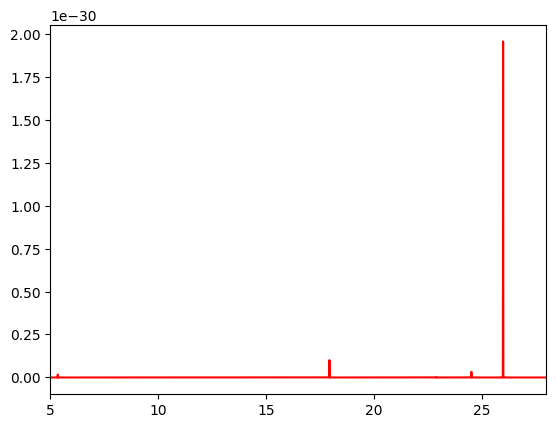

Si
ERROR: Could not find and line estimates ...
INFO: gen_specFromLineEstimates: build spectrum for 0 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.88 s


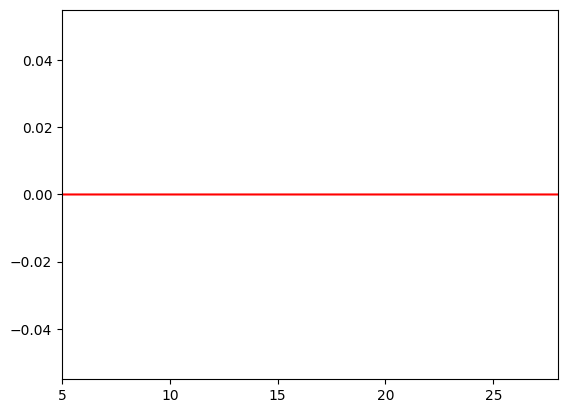

SO
ERROR: Could not find and line estimates ...
INFO: gen_specFromLineEstimates: build spectrum for 0 lines ...
INFO: gen_specFromLineEstimates: convolve spectrum ...
INFO: time:  1.81 s


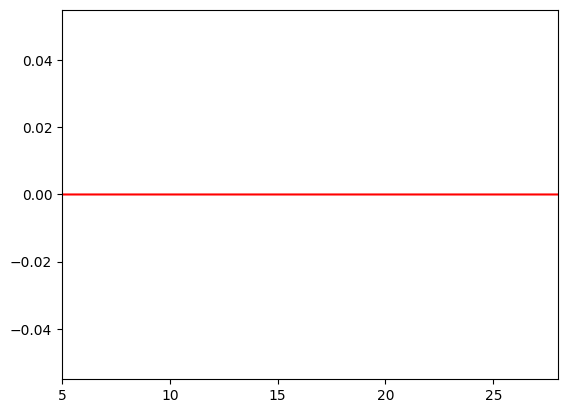

In [207]:
wlrange = [5, 28]
idents = list()
for est in model.lineEstimates:
    idents.append(est.ident)
idents = set(idents)
for id in idents:
    print(id)
    molecule_spec = model.gen_specFromLineEstimates(ident=id, wlrange=wlrange, noCont=True)
    plt.plot(molecule_spec[0], molecule_spec[1], 'r')
    plt.xlim(wlrange)
    plt.show()